In [1]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Cleaning**

First we will remove some columns. Most of the columns removed are columns which provide foresight, so we need to remove them or else we would have a very accurate model in training but not in production. These are the variables that contain statistics from the current fixture, which were used to engineer other features such as moving averages, ratios, and poisson statistics among others. Other columns contain either incorrect, incomplete or irrelevent information.

In [2]:
df = pd.read_csv(r"C:\Users\kiera\Downloads\ratios_and_accuracy_stats_df.csv")

In [3]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'Unnamed: 0.1.1.1.1',
 'Unnamed: 0.1.1.1.1.1',
 'Unnamed: 0.1.1.1.1.1.1',
 'level_0',
 'index',
 'Home',
 'Away',
 'Home Score',
 'Away Score',
 'Date',
 'Home Ball Possession',
 'Away Ball Possession',
 'Home Goal Attempts',
 'Away Goal Attempts',
 'Home Shots on Goal',
 'Away Shots on Goal',
 'Home Shots off Goal',
 'Away Shots off Goal',
 'Home Corner Kicks',
 'Away Corner Kicks',
 'First Half Home Goals',
 'First Half Away Goals',
 '2nd Half Home Goals',
 '2nd Half Away Goals',
 'Home Lineup',
 'Away Lineup',
 'Home Team Full Time Odds',
 'Draw Full Time Odds',
 'Away Team Full Time Odds',
 'Over 2.5 Full Time Odds',
 'Under 2.5 Full Time Odds',
 'BTS Yes Full Time Odds',
 'BTS No Full Time Odds',
 'Home 1st Half Ball Possession',
 'Away 1st Half Ball Possession',
 'Home 1st Half Goal Attempts',
 'Away 1st Half Goal Attempts',
 'Home 1st Half Shots on Goal',
 'Away 1st Half Shots on Goal',
 'Home 1st Half Shot

In [4]:
for column in df.columns:
    nan_count = df[column].isna().sum()
    print(f"{column}: {nan_count} NaN values")

Unnamed: 0: 0 NaN values
Unnamed: 0.1: 0 NaN values
Unnamed: 0.1.1: 0 NaN values
Unnamed: 0.1.1.1: 0 NaN values
Unnamed: 0.1.1.1.1: 0 NaN values
Unnamed: 0.1.1.1.1.1: 0 NaN values
Unnamed: 0.1.1.1.1.1.1: 0 NaN values
level_0: 0 NaN values
index: 0 NaN values
Home: 0 NaN values
Away: 0 NaN values
Home Score: 0 NaN values
Away Score: 0 NaN values
Date: 0 NaN values
Home Ball Possession: 0 NaN values
Away Ball Possession: 0 NaN values
Home Goal Attempts: 0 NaN values
Away Goal Attempts: 0 NaN values
Home Shots on Goal: 0 NaN values
Away Shots on Goal: 0 NaN values
Home Shots off Goal: 0 NaN values
Away Shots off Goal: 0 NaN values
Home Corner Kicks: 0 NaN values
Away Corner Kicks: 0 NaN values
First Half Home Goals: 0 NaN values
First Half Away Goals: 0 NaN values
2nd Half Home Goals: 0 NaN values
2nd Half Away Goals: 0 NaN values
Home Lineup: 0 NaN values
Away Lineup: 0 NaN values
Home Team Full Time Odds: 0 NaN values
Draw Full Time Odds: 0 NaN values
Away Team Full Time Odds: 0 NaN val

In [5]:
df = df.drop(['Unnamed: 0',
               'Unnamed: 0.1',
               'Unnamed: 0.1.1',
               'Unnamed: 0.1.1.1',
               'Unnamed: 0.1.1.1.1', 
               'Unnamed: 0.1.1.1.1.1', 
               'Unnamed: 0.1.1.1.1.1.1', 
               'Home Win', 
               'Away Win', 
               'level_0', 
               'Country', 
               'League', 
               'Kickoff', 
               'index', 
               'Home', 
               'Away', 
               'Date', 
               'Home Ball Possession', 
               'Away Ball Possession', 
               'Home Goal Attempts', 
               'Away Goal Attempts', 
               'Home Shots on Goal', 
               'Away Shots on Goal', 
               'Home Shots off Goal', 
               'Away Shots off Goal', 
               'Home Corner Kicks', 
               'Away Corner Kicks', 
               '2nd Half Home Goals', 
               '2nd Half Away Goals', 
               'Home Lineup', 
               'Away Lineup', 
               'Home 1st Half Ball Possession', 
               'Away 1st Half Ball Possession', 
               'Home 1st Half Goal Attempts', 
               'Away 1st Half Goal Attempts', 
               'Home 1st Half Shots on Goal', 
               'Away 1st Half Shots on Goal', 
               'Home 1st Half Shots off Goal', 
               'Away 1st Half Shots off Goal', 
               'Home 1st Half Corner Kicks', 
               'Away 1st Half Corner Kicks', 
               'Home 2nd Half Ball Possession', 
               'Away 2nd Half Ball Possession', 
               'Home 2nd Half Goal Attempts', 
               'Away 2nd Half Goal Attempts', 
               'Home 2nd Half Shots on Goal', 
               'Away 2nd Half Shots on Goal', 
               'Home 2nd Half Shots off Goal', 
               'Away 2nd Half Shots off Goal', 
               'Home 2nd Half Corner Kicks', 
               'Away 2nd Half Corner Kicks', 
               'Home Team Congestion 7', 
               'Home Team Congestion 14', 
               'Home Team Congestion 28', 
               'Away Team Congestion 7', 
               'Away Team Congestion 14', 
               'Away Team Congestion 28', 
               'Days Since Last Match Home', 
               'Home Over 35 Ratio 3', 
               'Home Over 35 Ratio 5', 
               'Home Over 35 Ratio 8', 
               'Away Over 35 Ratio 3', 
               'Away Over 35 Ratio 5', 
               'Away Over 35 Ratio 8', 
               'Days Since Last Match Away', 
               'home_goal_times', 
               'away_goal_times', 
               'home_fg', 
               'away_fg'], 
              axis=1)

df = df.dropna(axis=0)


We create some target variables. This script will be looking at classifying fixtures according to the target variable 'home_win'

In [6]:
df['home_win'] = (df['Home Score'] > df['Away Score']).astype(int)
df['draw'] = (df['Home Score'] == df['Away Score']).astype(int)
df['away_win'] = (df['Away Score'] > df['Home Score']).astype(int)
df['fhg'] = (df['First Half Home Goals'] + df['First Half Away Goals'] > 0).astype(int)
df['home_win_prob'] = (round(1 / df['Home Team Full Time Odds'], 2)).astype(float)
df['draw_prob'] = (round(1 / df['Draw Full Time Odds'], 2)).astype(float)
df['away_win_prob'] = (round(1 / df['Away Team Full Time Odds'], 2)).astype(float)
df['o25_prob'] = (round(1 / df['Over 2.5 Full Time Odds'], 2)).astype(float)
df['bts_prob'] = (round(1 / df['BTS Yes Full Time Odds'], 2)).astype(float)
df['home_goal'] = (df['Home Score'] > 0).astype(int)
df['away_goal'] = (df['Away Score'] > 0).astype(int)

After removing the NaN values, we do some processing on the columns presenting possession, odds, and goal time data. We are looking to have data ranging in scale from 0 to 1, so this processing will save us having to scale them later in a way that might delete information in the column.

In [7]:
for col in df.columns:
    if "Possession" in col:
        df[col] = df[col]/100

for col in df.columns:
    if "Odds" in col:
        df[col] = 1 / (df[col])

for col in df.columns:
    if "First Goal" in col:
        df[col] = round(((df[col]) / 90), 2)

**EDA**

We do some basic EDA on our dataset. First we look at the success bookmakers have in predicting outcomes in soccer matches.
We do this by counting the win % for each implied probability given by the odds with an interval of 0.01 or 1%.

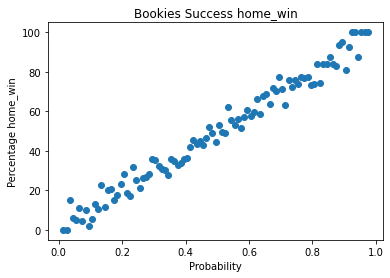

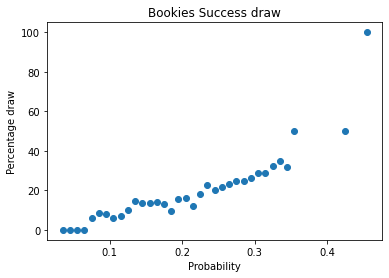

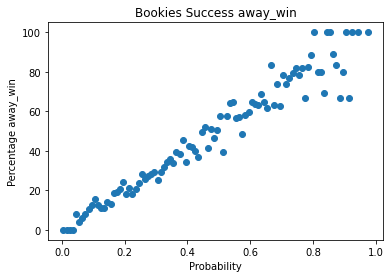

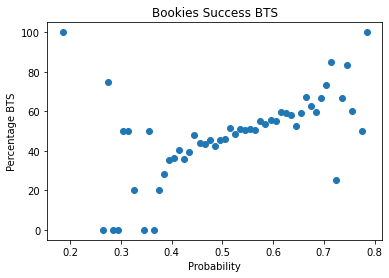

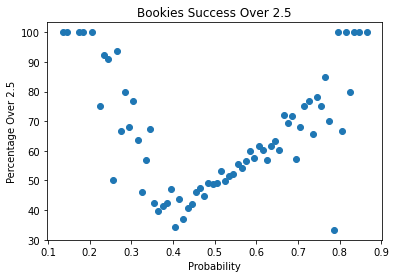

In [8]:
targets = ['home_win', 'draw', 'away_win', 'BTS', 'Over 2.5']
probs = ['home_win_prob', 'draw_prob', 'away_win_prob', 'bts_prob', 'o25_prob']

for col, prob in zip(targets, probs):
    # create 100 probability buckets
    buckets = np.linspace(0, 1, 101)

    # assign each row to its corresponding probability bucket
    df['Bucket'] = pd.cut(df[f'{prob}'], bins=buckets, include_lowest=True)

    # calculate the percentage of home wins for each bucket
    freq = df.groupby('Bucket')[f'{col}'].sum() / df.groupby('Bucket')[f'{col}'].count() * 100

    # create a scatter plot of percentage of BTS vs bucket midpoint
    midpoints = (buckets[:-1] + buckets[1:]) / 2
    plt.scatter(midpoints, freq)

    # set the x and y axis labels
    plt.xlabel('Probability')
    plt.ylabel(f'Percentage {col}')

    # set the title of the plot
    plt.title(f'Bookies Success {col}')

    # display the plot
    plt.show()

These charts make it clear that the win draw loss markets are very efficient. There is a strong correlation between the implied probability for all three outcomes and their true rate. However we do see that the tightness of the line in the chart for *'away_win'* for outsiders which slackens for favourites playing away from home.

The market for BTS is much less efficient. For those games with probability between 0.45 and 0.6 we see a good, bunched line- but great variance at both extremes. The same is true for the over 2.5 market. This suggests that there is perhaps greater opportunity for a model to beat the bookmakers in these markets than in the traditional WDL market.

Continuing on, we look at the distribution of our target variables. 

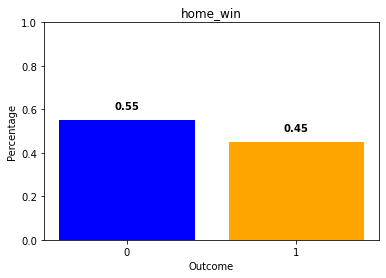

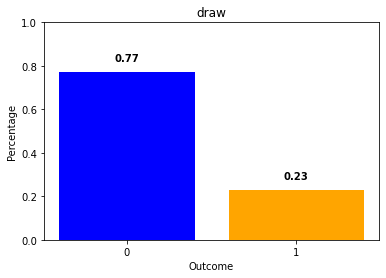

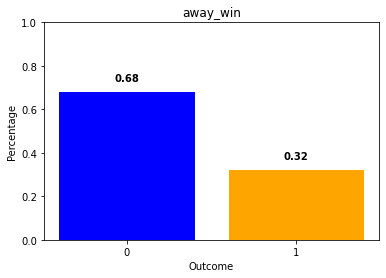

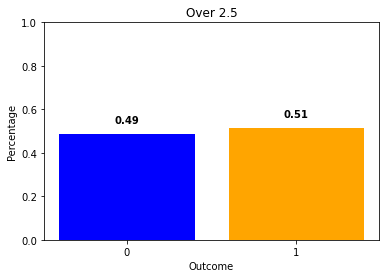

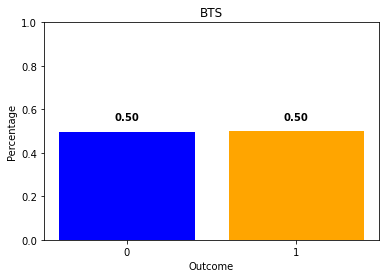

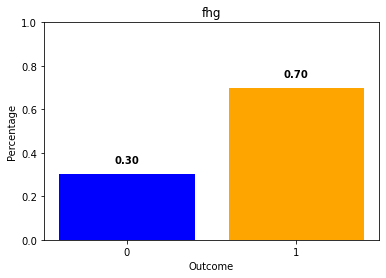

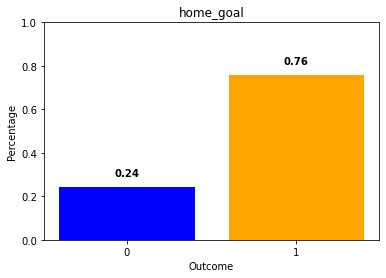

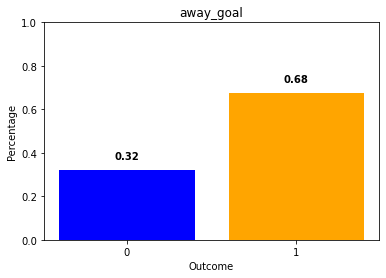

In [9]:
target_vars = ['home_win', 'draw', 'away_win', 'Over 2.5', 'BTS', 'fhg', 'home_goal', 'away_goal']
labels = ['0', '1']

for var in target_vars:
    counts = df[var].value_counts(normalize=True).sort_index()
    plt.bar(labels, counts, color=['blue', 'orange'])
    plt.title(var)
    plt.xlabel('Outcome')
    plt.ylabel('Percentage')
    plt.ylim([0, 1])

    for i, count in enumerate(counts):
        plt.text(i, count+0.05, f'{count:.2f}', ha='center', fontweight='bold')

    plt.show()

We have imbalance in all of our WDL targets and a nice balance in Over 2.5 and BTS. For this script we are looking at home_win which has a 45% success rate. We can random oversampling or random undersampling to account for this, or use weighted classes when creating our model. We will look at both. 

For later regression models, we look at the distribution of our non binary discrete targets, total goals, home score, and away score. All three targets have a positive skew. We will remove the outliers in these columns and forget about this for now, however.

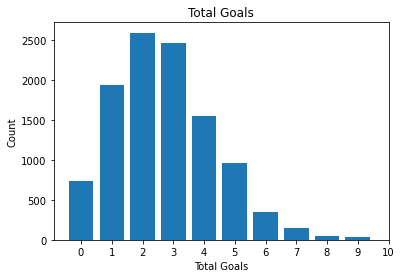

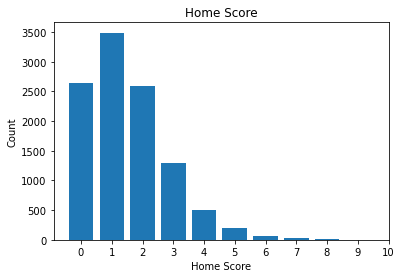

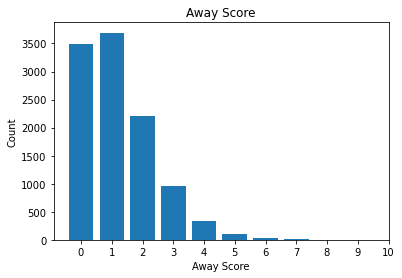

In [10]:
target_vars = ['Total Goals','Home Score', 'Away Score']
bins = range(11)

for var in target_vars:
    counts, _ = np.histogram(df[var], bins=bins)
    plt.bar(bins[:-1], counts)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(range(11))


    plt.show()

In [11]:
# remove outliers

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

targets = ['draw', 'away_win', 'fhg', 'home_goal', 'away_goal', "Total Goals", "Over 2.5",
           "away_win_prob",'home_win_prob', "Home Score", "Away Score",
           "fhg", "First Half Home Goals", "First Half Away Goals", "Bucket"]

for col in numeric_cols:
    if col in targets:
        continue
    mean = df[col].mean()
    std_dev = df[col].std()
    threshold = mean + (4 * std_dev)
    outliers = df.loc[df[col] > threshold]
    df = df.loc[df[col] <= threshold]

In [12]:
df

,Home Score,Away Score,First Half Home Goals,First Half Away Goals,Home Team Full Time Odds,Draw Full Time Odds,Away Team Full Time Odds,Over 2.5 Full Time Odds,Under 2.5 Full Time Odds,BTS Yes Full Time Odds,...,away_win,fhg,home_win_prob,draw_prob,away_win_prob,o25_prob,bts_prob,home_goal,away_goal,Bucket
0,0.0,1.0,0.0,1.0,0.257511,0.310398,0.489796,0.424929,0.637620,0.489796,...,1,1,0.26,0.31,0.49,0.42,0.49,0,1,"(0.41, 0.42]"
1,2.0,2.0,1.0,0.0,0.432588,0.300752,0.320513,0.516351,0.540541,0.573614,...,0,1,0.43,0.30,0.32,0.52,0.57,1,1,"(0.51, 0.52]"
2,1.0,0.0,0.0,0.0,0.455927,0.319319,0.274977,0.413508,0.648649,0.490597,...,0,0,0.46,0.32,0.27,0.41,0.49,1,0,"(0.4, 0.41]"
3,1.0,2.0,0.0,1.0,0.456274,0.325733,0.270392,0.418118,0.645161,0.499584,...,1,1,0.46,0.33,0.27,0.42,0.50,1,1,"(0.41, 0.42]"
4,1.0,1.0,1.0,1.0,0.418702,0.336134,0.301356,0.390371,0.668151,0.478088,...,0,1,0.42,0.34,0.30,0.39,0.48,1,1,"(0.38, 0.39]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15497,1.0,2.0,1.0,0.0,0.386100,0.346620,0.317125,0.352609,0.699301,0.461681,...,1,1,0.39,0.35,0.32,0.35,0.46,1,1,"(0.34, 0.35]"
15498,3.0,2.0,0.0,1.0,0.620476,0.256082,0.172166,0.521921,0.529661,0.519211,...,0,1,0.62,0.26,0.17,0.52,0.52,1,1,"(0.51, 0.52]"
15500,3.0,3.0,1.0,1.0,0.395257,0.311850,0.343446,0.504541,0.548847,0.576037,...,0,1,0.40,0.31,0.34,0.50,0.58,1,1,"(0.49, 0.5]"
15501,0.0,0.0,0.0,0.0,0.542986,0.285714,0.220264,0.463822,0.590319,0.503525,...,0,0,0.54,0.29,0.22,0.46,0.50,0,0,"(0.45, 0.46]"


We take a look at the distribution of some of our predictor variables. It is likely that we will see some positive skew
in some of our variables. If so we can scale our variables and then apply a box-cox transformation to normalise the distribution of the data

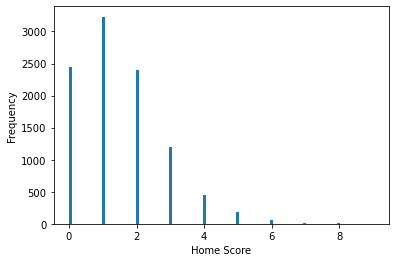

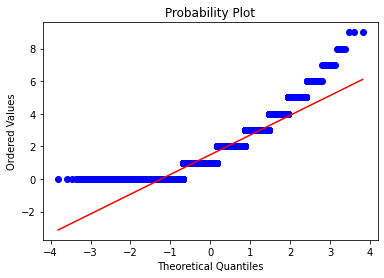

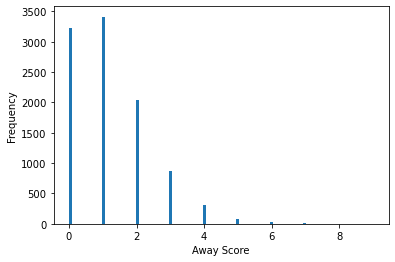

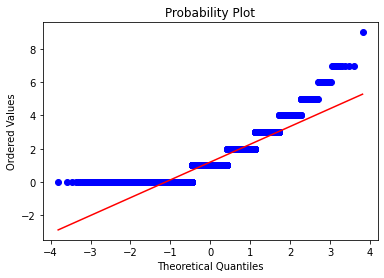

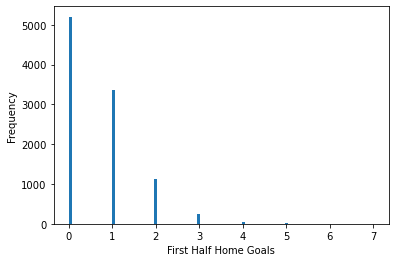

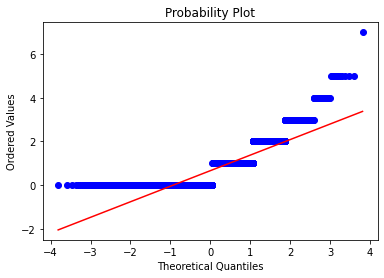

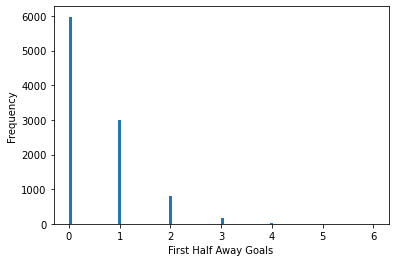

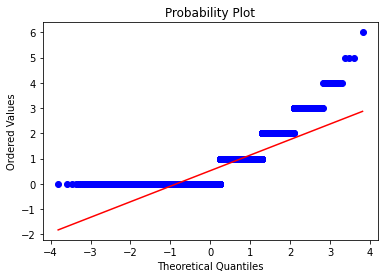

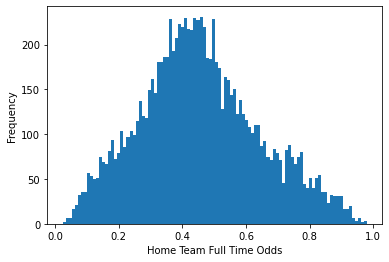

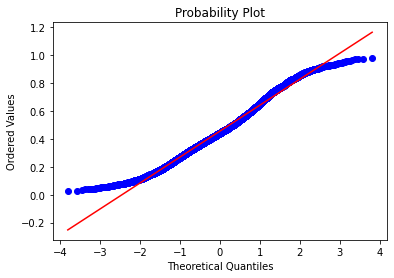

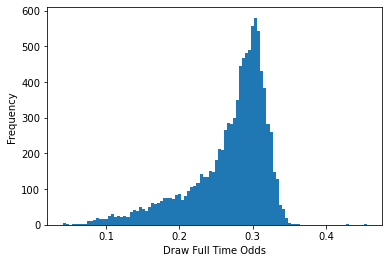

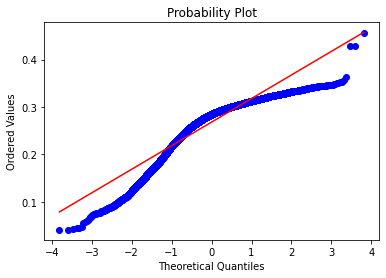

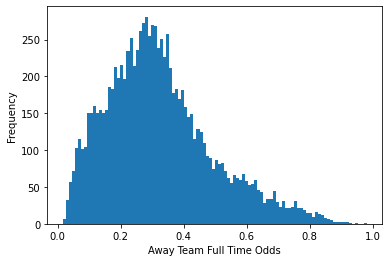

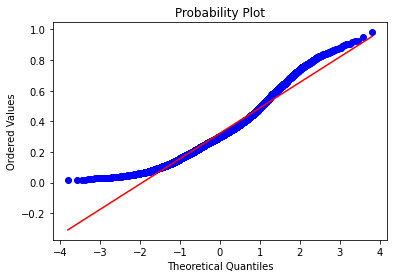

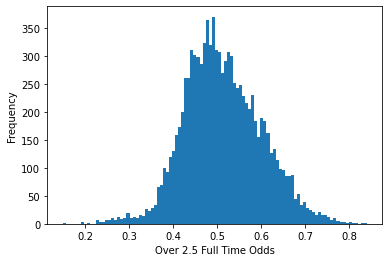

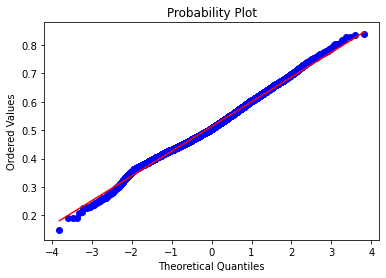

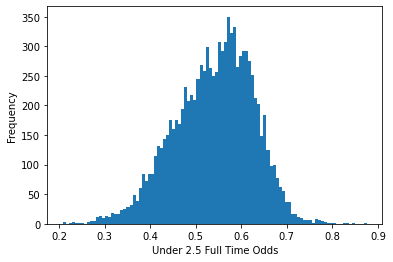

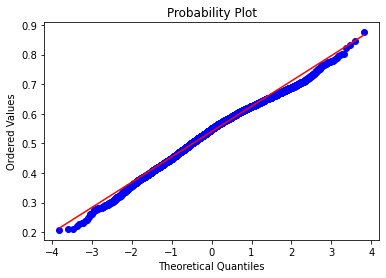

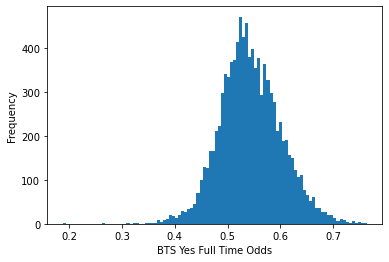

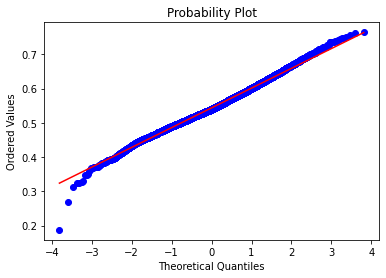

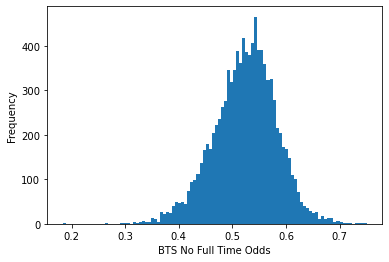

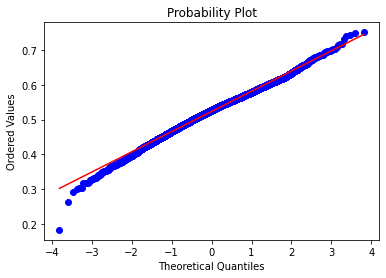

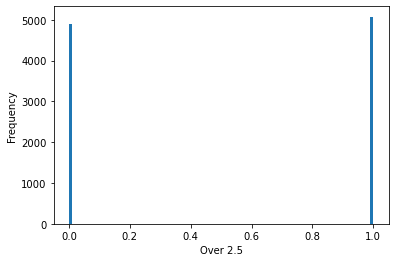

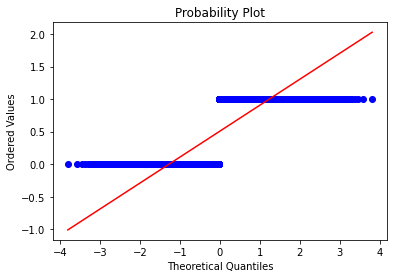

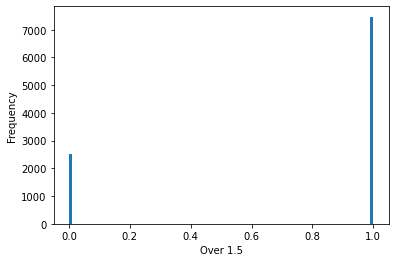

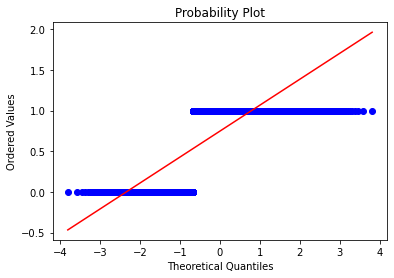

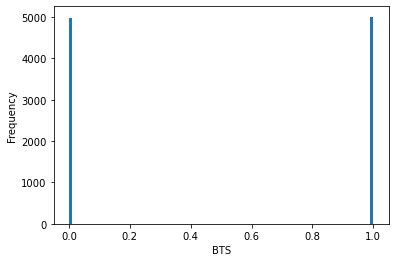

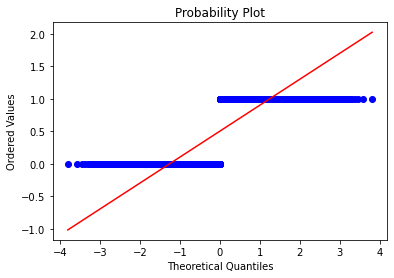

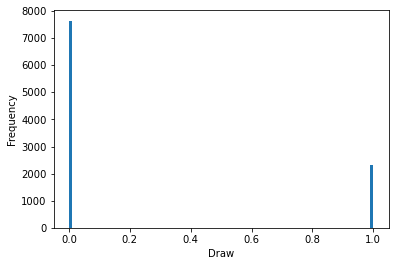

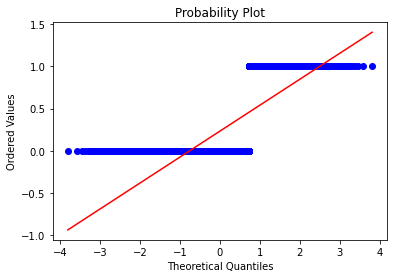

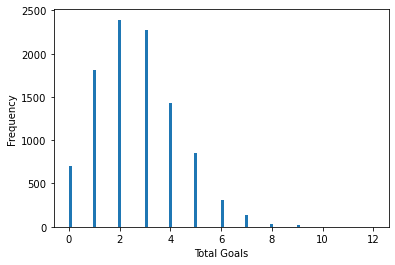

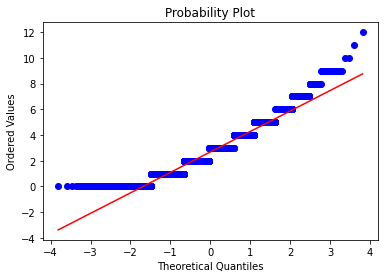

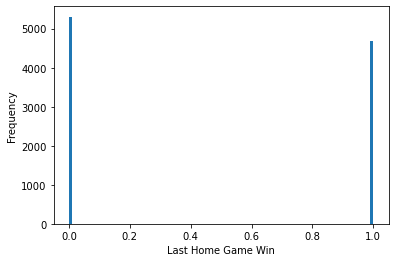

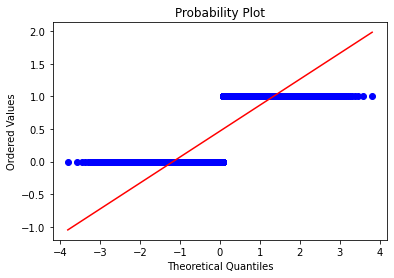

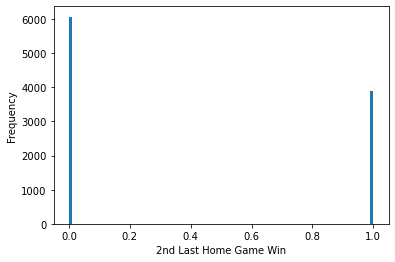

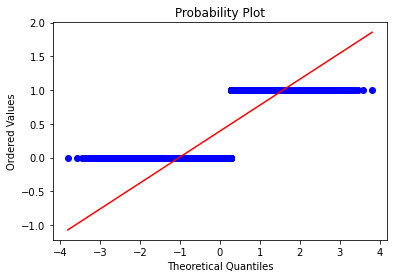

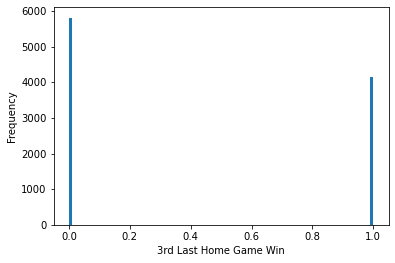

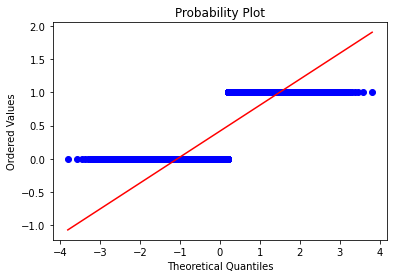

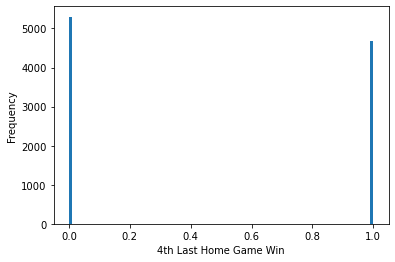

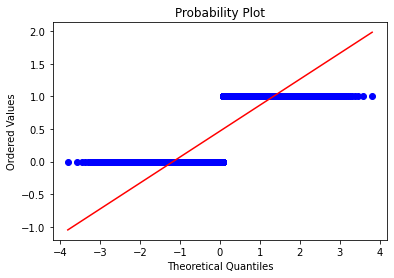

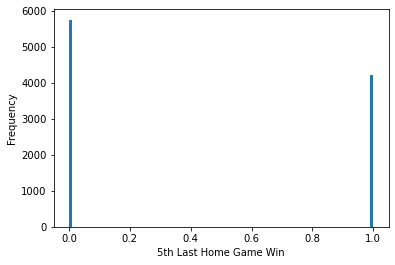

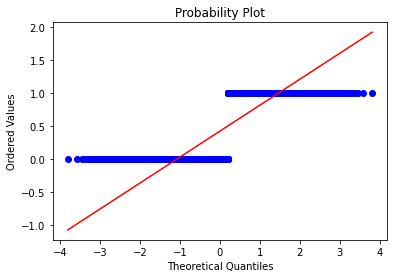

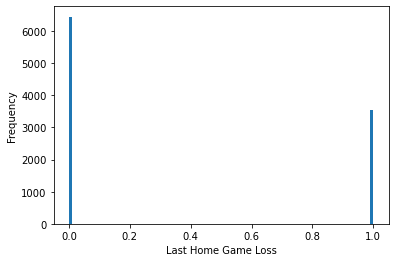

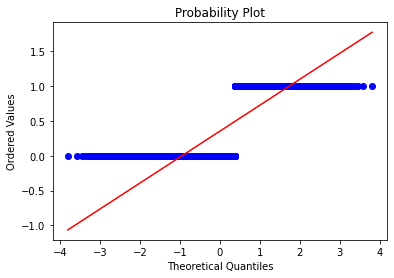

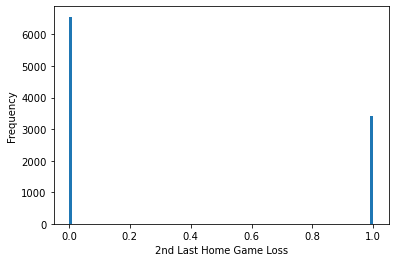

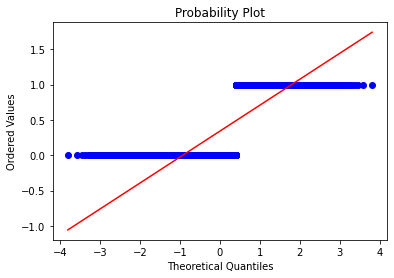

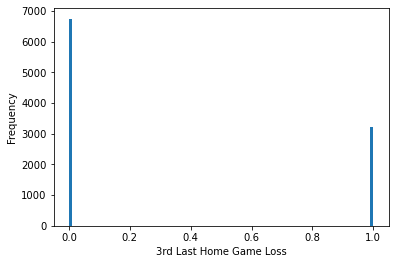

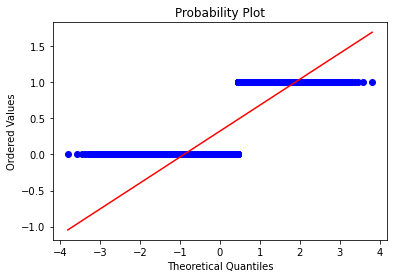

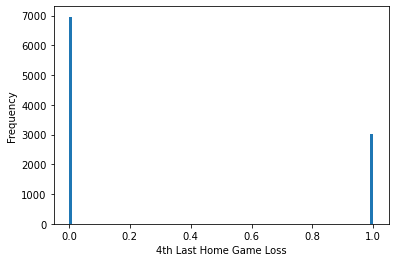

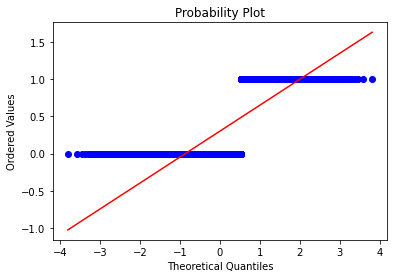

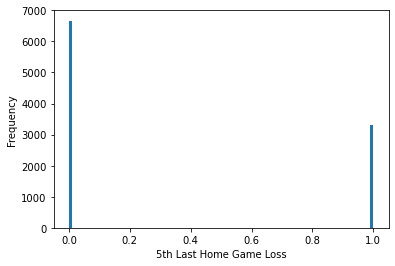

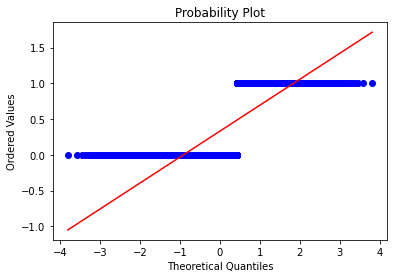

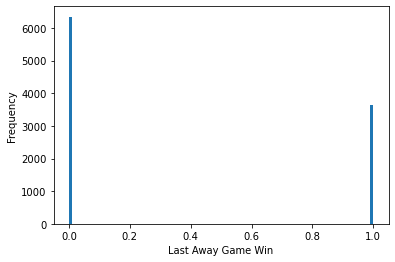

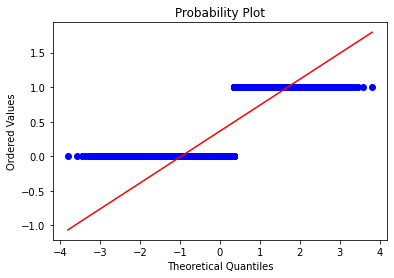

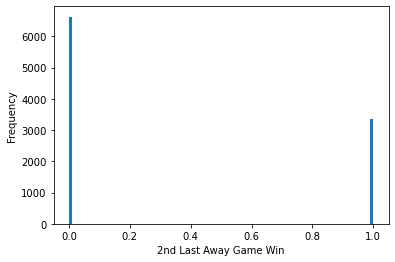

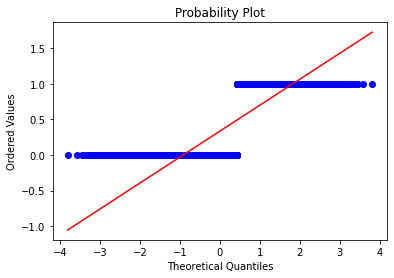

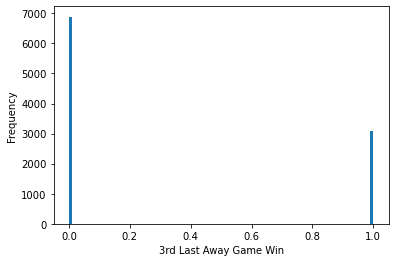

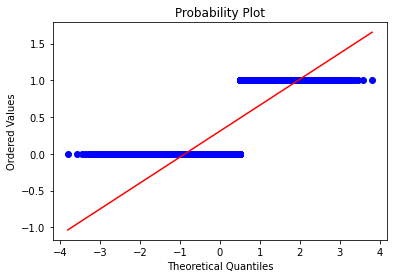

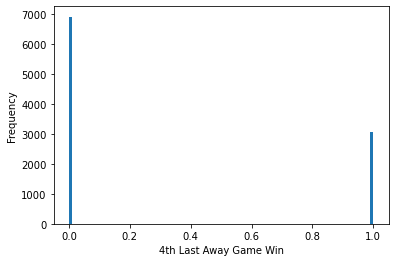

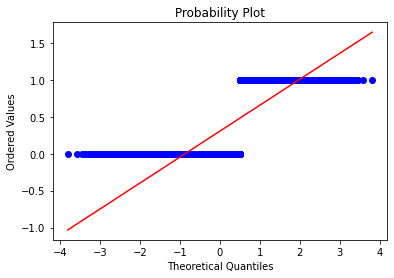

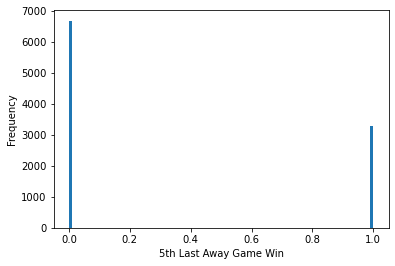

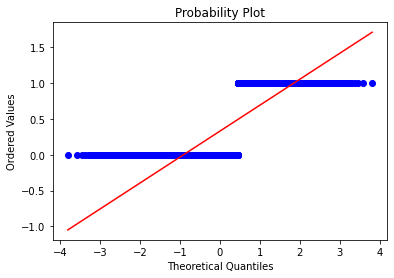

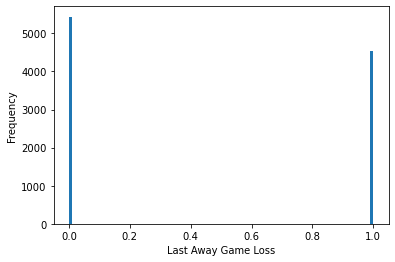

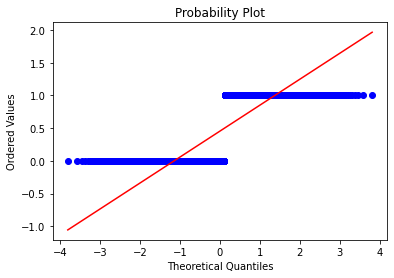

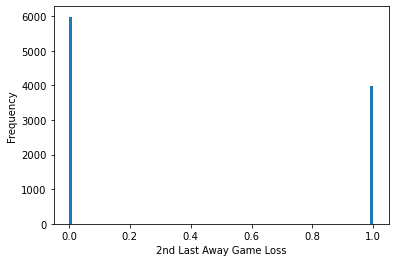

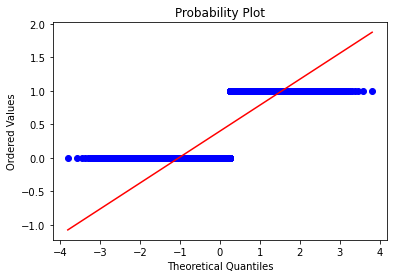

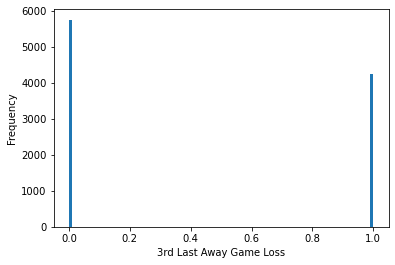

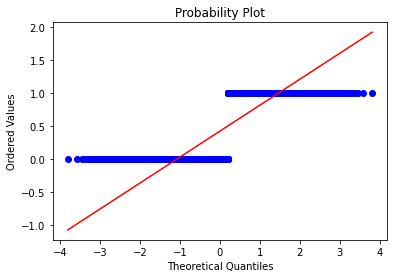

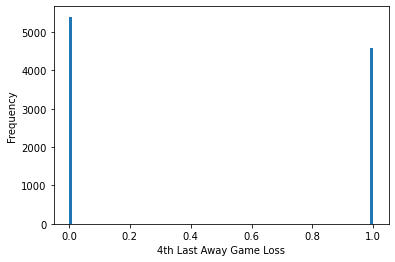

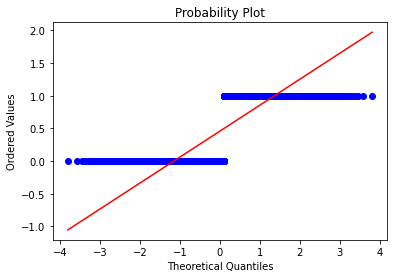

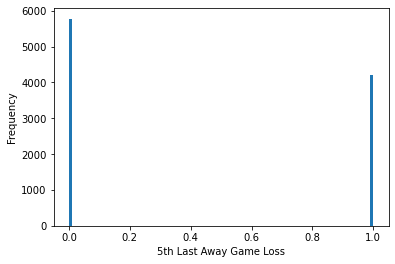

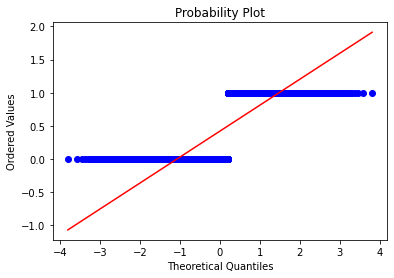

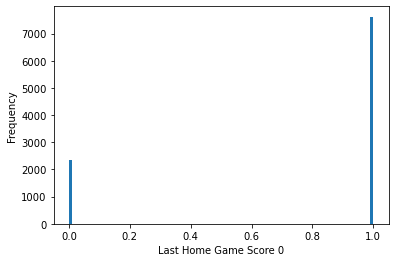

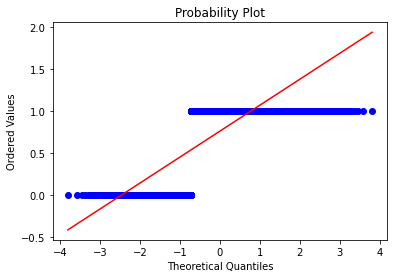

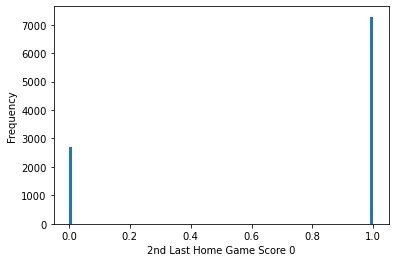

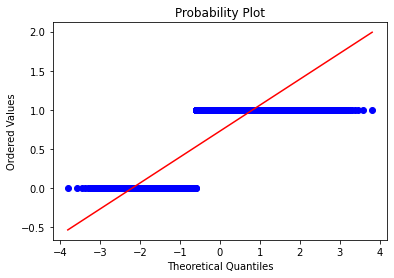

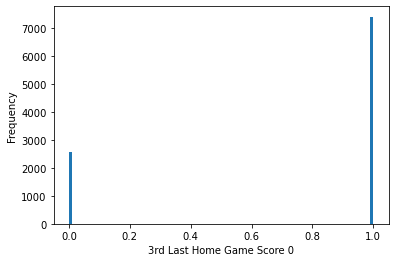

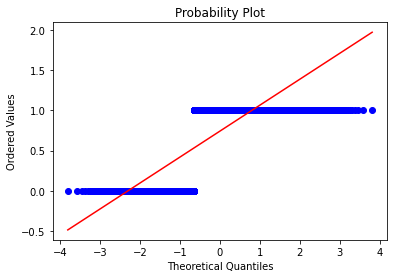

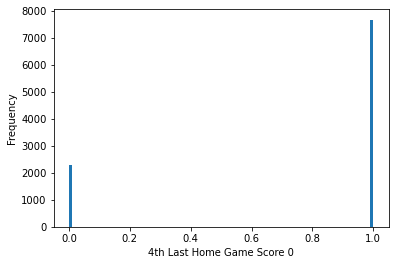

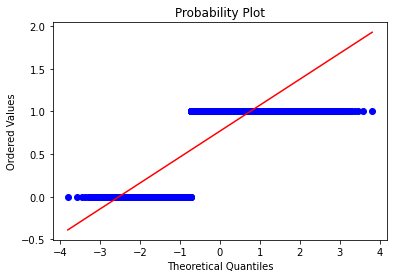

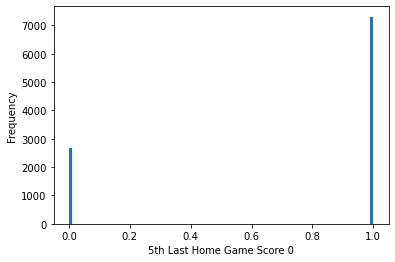

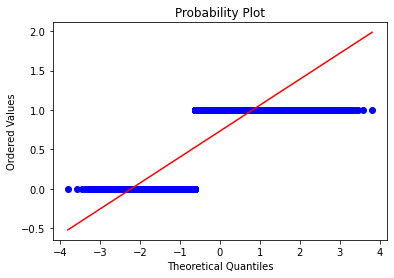

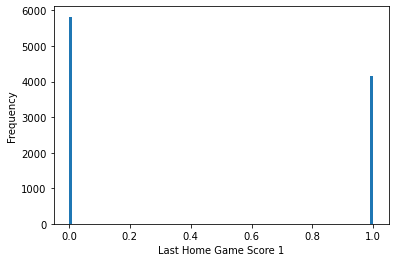

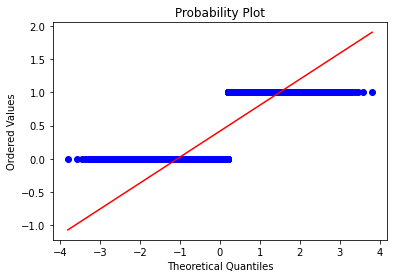

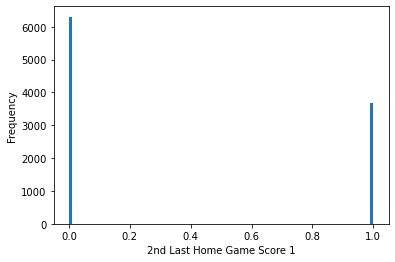

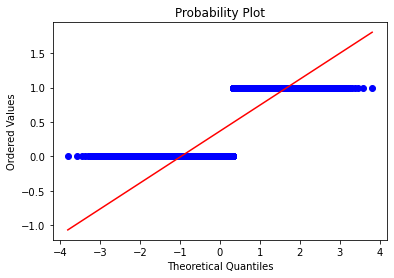

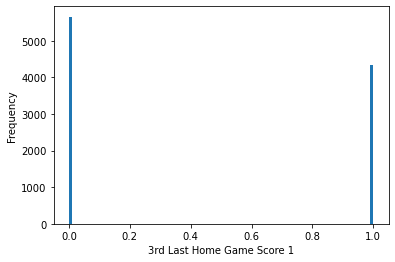

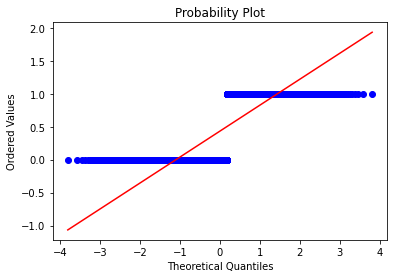

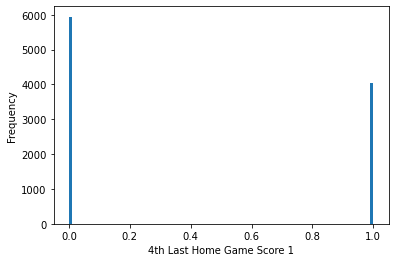

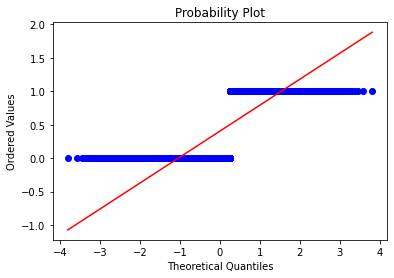

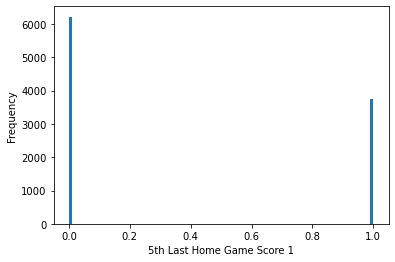

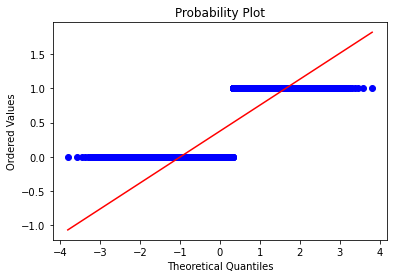

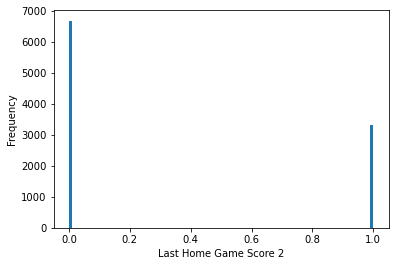

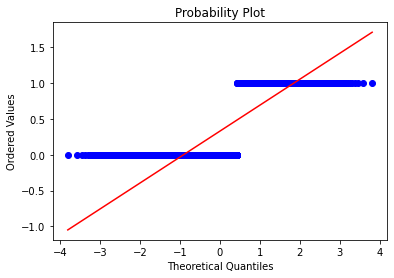

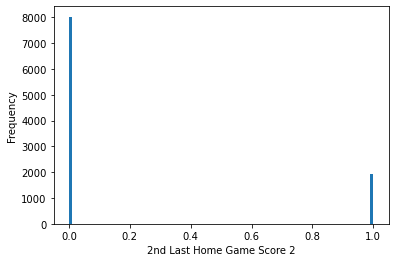

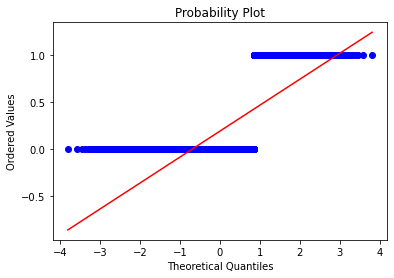

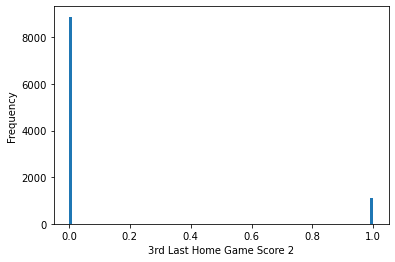

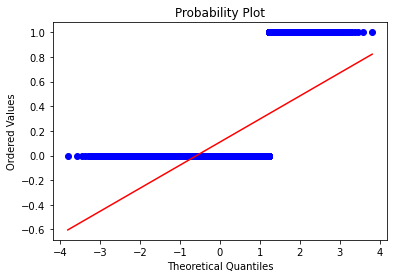

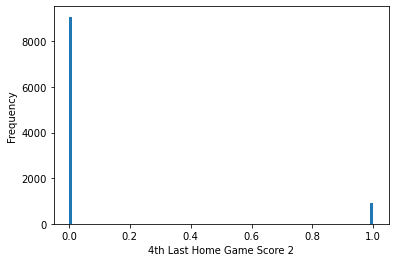

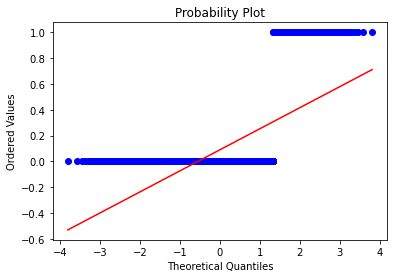

In [13]:
discrete_vars_strings = ["Game Win", "Game Loss", "Game Score", "Game Concede", 
                         "home_win", "draw", "away_win", "fhg", "bts", "BTS", "Draw", "Away Win", "Home Win"
                         'o25', 'home_goal', 'away_goal', "Over 1.5", "Over 2.5", "Total Goals", "Bucket"]

for col in df.columns[:50]:
    if any(var_string in column for var_string in discrete_vars_strings):
        continue
    else:
        x = df[col]
        # Create a histogram of the predictor variable
        plt.hist(x, bins=100)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        # Create a Q-Q plot of the predictor variable
        stats.probplot(x, dist="norm", plot=plt)
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Ordered Values')
        plt.show()

In [14]:
df_original = df.copy()

In [15]:
list(df.columns)

['Home Score',
 'Away Score',
 'First Half Home Goals',
 'First Half Away Goals',
 'Home Team Full Time Odds',
 'Draw Full Time Odds',
 'Away Team Full Time Odds',
 'Over 2.5 Full Time Odds',
 'Under 2.5 Full Time Odds',
 'BTS Yes Full Time Odds',
 'BTS No Full Time Odds',
 'Over 2.5',
 'Over 1.5',
 'BTS',
 'Draw',
 'Total Goals',
 'Last Home Game Win',
 '2nd Last Home Game Win',
 '3rd Last Home Game Win',
 '4th Last Home Game Win',
 '5th Last Home Game Win',
 'Last Home Game Loss',
 '2nd Last Home Game Loss',
 '3rd Last Home Game Loss',
 '4th Last Home Game Loss',
 '5th Last Home Game Loss',
 'Last Away Game Win',
 '2nd Last Away Game Win',
 '3rd Last Away Game Win',
 '4th Last Away Game Win',
 '5th Last Away Game Win',
 'Last Away Game Loss',
 '2nd Last Away Game Loss',
 '3rd Last Away Game Loss',
 '4th Last Away Game Loss',
 '5th Last Away Game Loss',
 'Last Home Game Score 0',
 '2nd Last Home Game Score 0',
 '3rd Last Home Game Score 0',
 '4th Last Home Game Score 0',
 '5th Last Ho

In [16]:
# get columns to normalise

to_scale = ['Home Team Scored Last 3',
 'Home Team Scored Last 5',
 'Home Team Scored Last 8',
 'Home Team Conceded Last 3',
 'Home Team Conceded Last 5',
 'Home Team Conceded Last 8',
 'Away Team Scored Last 3',
 'Away Team Scored Last 5',
 'Away Team Scored Last 8',
 'Away Team Conceded Last 3',
 'Away Team Conceded Last 5',
 'Away Team Conceded Last 8',
 'Home Team Scored 1st Half Last 3',
 'Home Team Scored 1st Half Last 5',
 'Home Team Scored 1st Half Last 8',
 'Home Team Conceded 1st Half Last 3',
 'Home Team Conceded 1st Half Last 5',
 'Home Team Conceded 1st Half Last 8',
 'Away Team Scored 1st Half Last 3',
 'Away Team Scored 1st Half Last 5',
 'Away Team Scored 1st Half Last 8',
 'Away Team Conceded 1st Half Last 3',
 'Away Team Conceded 1st Half Last 5',
 'Away Team Conceded 1st Half Last 8',
 'Home Team Scored 2nd Half Last 3',
 'Home Team Scored 2nd Half Last 5',
 'Home Team Scored 2nd Half Last 8',
 'Home Team Conceded 2nd Half Last 3',
 'Home Team Conceded 2nd Half Last 5',
 'Home Team Conceded 2nd Half Last 8',
 'Away Team Scored 2nd Half Last 3',
 'Away Team Scored 2nd Half Last 5',
 'Away Team Scored 2nd Half Last 8',
 'Away Team Conceded 2nd Half Last 3',
 'Away Team Conceded 2nd Half Last 5',
 'Away Team Conceded 2nd Half Last 8',
 'Home Team Shots Target 3',
 'Home Team Shots Target 5',
 'Home Team Shots Target 8',
 'Home Team Shots Target Conceded 3',
 'Home Team Shots Target Conceded 5',
 'Home Team Shots Target Conceded 8',
 'Away Team Shots Target  3',
 'Away Team Shots Target 5',
 'Away Team Shots Target 8',
 'Away Team Shots Target Conceded 3',
 'Away Team Shots Target Conceded 5',
 'Away Team Shots Target Conceded 8',
 'Home Team Shots Target 1st Half 3',
 'Home Team Shots Target 1st Half 5',
 'Home Team Shots Target 1st Half 8',
 'Home Team Shots Target Conceded 1st Half 3',
 'Home Team Shots Target Conceded 1st Half 5',
 'Home Team Shots Target Conceded 1st Half 8',
 'Home Team Shots Target 2nd Half 3',
 'Home Team Shots Target 2nd Half 5',
 'Home Team Shots Target 2nd Half 8',
 'Home Team Shots Target Conceded 2nd Half 3',
 'Home Team Shots Target Conceded 2nd Half 5',
 'Home Team Shots Target Conceded 2nd Half 8',
 'Away Team Shots Target 1st Half 3',
 'Away Team Shots Target 1st Half 5',
 'Away Team Shots Target 1st Half 8',
 'Away Team Shots Target Conceded 1st Half 3',
 'Away Team Shots Target Conceded 1st Half 5',
 'Away Team Shots Target Conceded 1st Half 8',
 'Away Team Shots Target 2nd Half 3',
 'Away Team Shots Target 2nd Half 5',
 'Away Team Shots Target 2nd Half 8',
 'Away Team Shots Target Conceded 2nd Half 3',
 'Away Team Shots Target Conceded 2nd Half 5',
 'Away Team Shots Target Conceded 2nd Half 8',
 'Home Team Shots 3',
 'Home Team Shots 5',
 'Home Team Shots 8',
 'Home Team Shots Conceded 3',
 'Home Team Shots Conceded Last 5',
 'Home Team Shots Conceded 8',
 'Away Team Shots 3',
 'Away Team Shots 5',
 'Away Team Shots 8',
 'Away Team Shots Conceded 3',
 'Away Team Shots Conceded Last 5',
 'Home Team Corner Average For 3',
 'Home Team Corner Average For 5',
 'Home Team Corner Average For 8',
 'Home Team Corner Average Against 3',
 'Home Team Corner Average Against 5',
 'Home Team Corner Average Against 8',
 'Home Team Corner Average For 1st Half 3',
 'Home Team Corner Average For 1st Half 5',
 'Home Team Corner Average For 1st Half 8',
 'Home Team Corner Average Against 1st Half 3',
 'Home Team Corner Average Against 1st Half 5',
 'Home Team Corner Average Against 1st Half 8',
 'Home Team Corner Average For 2nd Half 3',
 'Home Team Corner Average For 2nd Half 5',
 'Home Team Corner Average For 2nd Half 8',
 'Home Team Corner Average Against 2nd Half 3',
 'Home Team Corner Average Against 2nd Half 5',
 'Home Team Corner Average Against 2nd Half 8',
 'Away Team Corner Average For 3',
 'Away Team Corner Average For 5',
 'Away Team Corner Average For 8',
 'Away Team Corner Average Against 3',
 'Away Team Corner Average Against 5',
 'Away Team Corner Average Against 8',
 'Away Team Corner Average For 1st Half 3',
 'Away Team Corner Average For 1st Half 5',
 'Away Team Corner Average For 1st Half 8',
 'Away Team Corner Average Against 1st Half 3',
 'Away Team Corner Average Against 1st Half 5',
 'Away Team Corner Average Against 1st Half 8',
 'Away Team Corner Average For 2nd Half 3',
 'Away Team Corner Average For 2nd Half 5',
 'Away Team Corner Average For 2nd Half 8',
 'Away Team Corner Average Against 2nd Half 3',
 'Away Team Corner Average Against 2nd Half 5',
 'Away Team Corner Average Against 2nd Half 8']

to_normalise = []
normalised_cols = df[to_scale]

scaler = MinMaxScaler()
scaler.fit(normalised_cols)
df_scaled = pd.DataFrame(scaler.transform(normalised_cols), columns=normalised_cols.columns)
df_normalised = df_scaled.copy()

for column in df_normalised.columns:
    df_normalised[column], _ = boxcox(df_normalised[column] + 0.01)

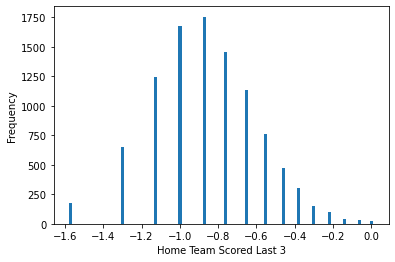

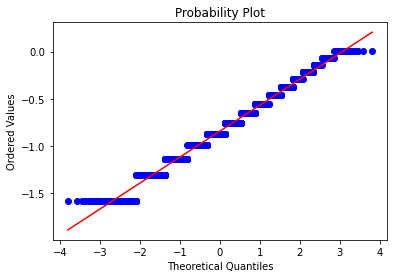

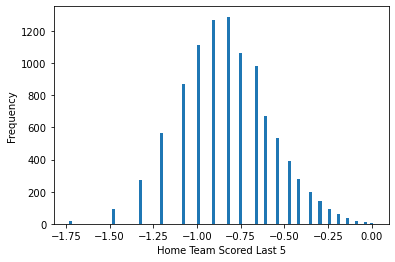

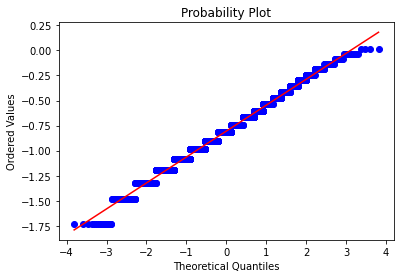

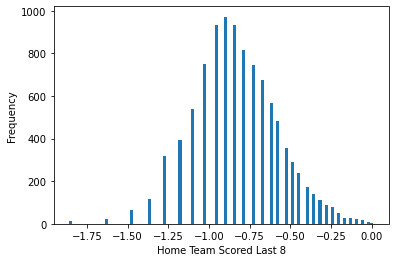

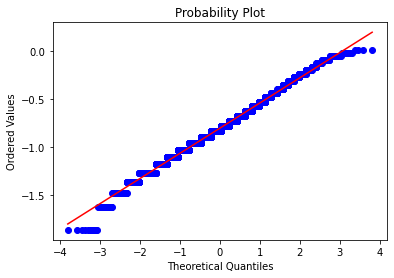

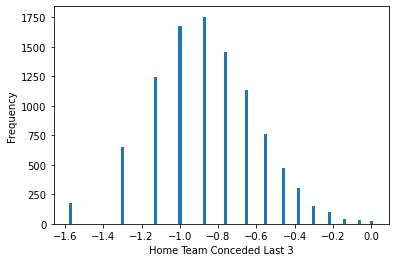

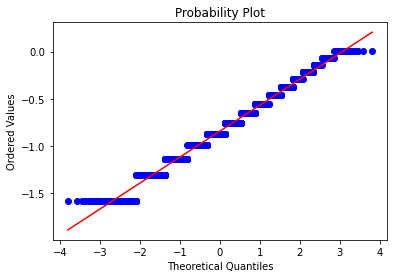

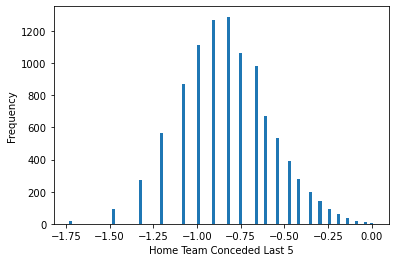

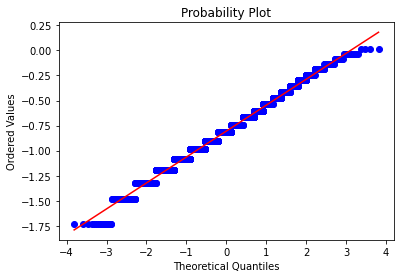

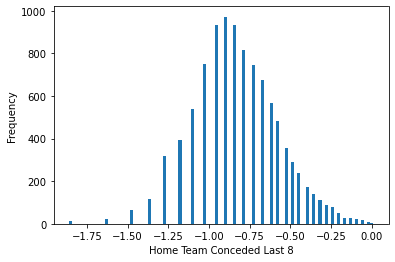

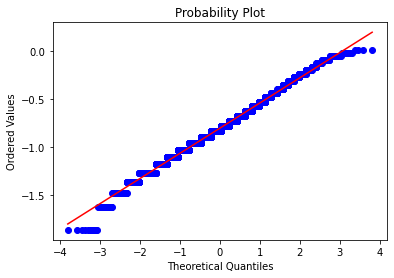

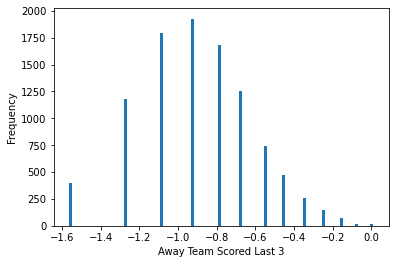

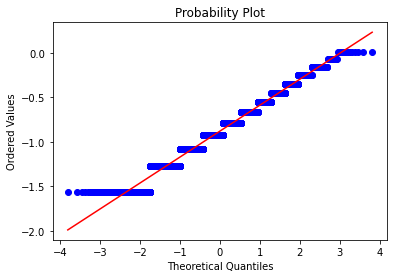

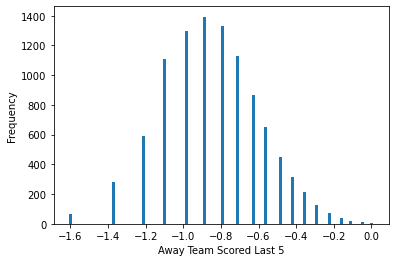

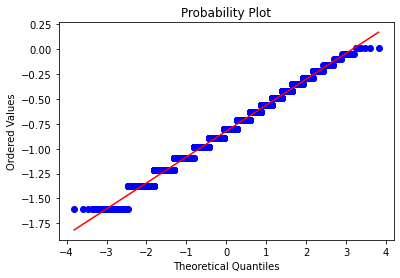

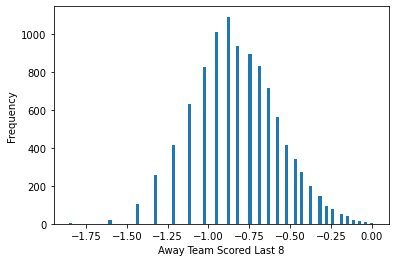

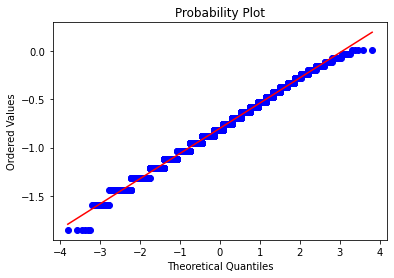

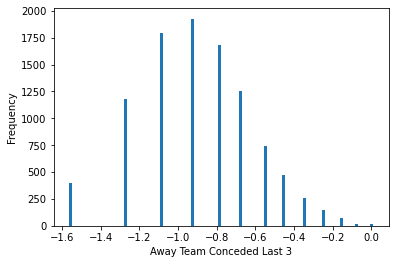

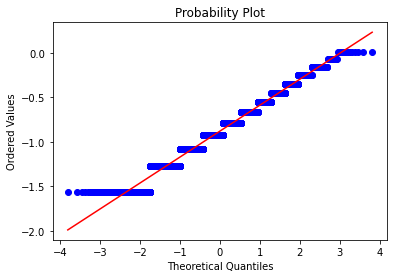

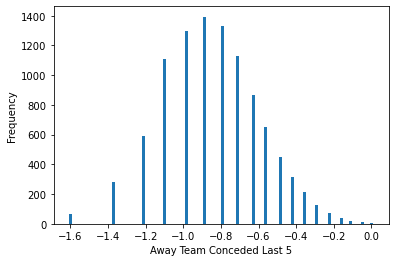

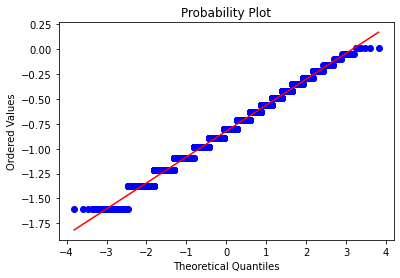

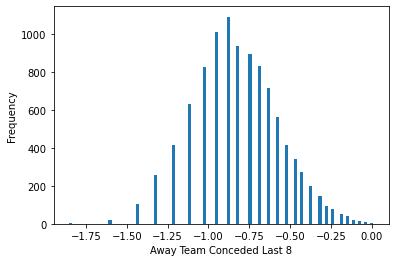

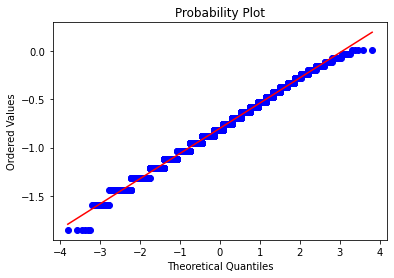

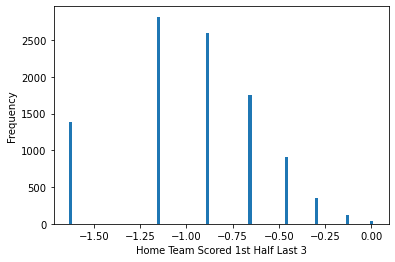

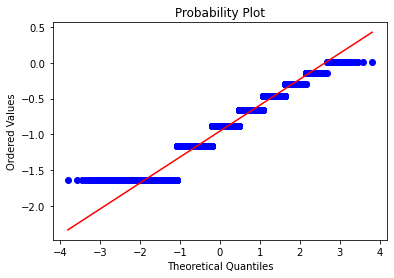

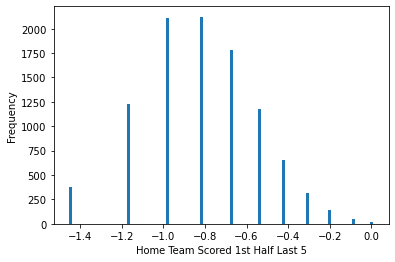

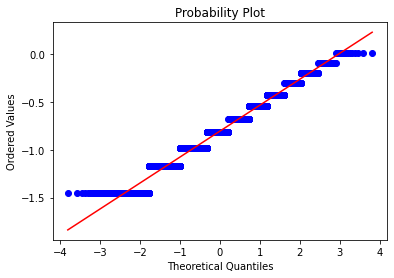

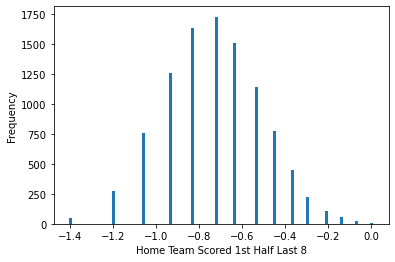

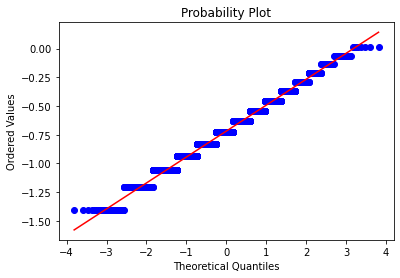

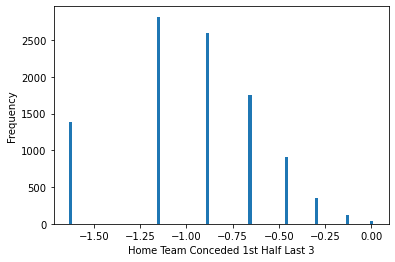

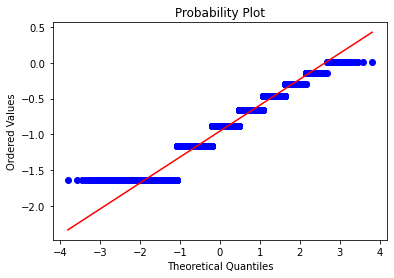

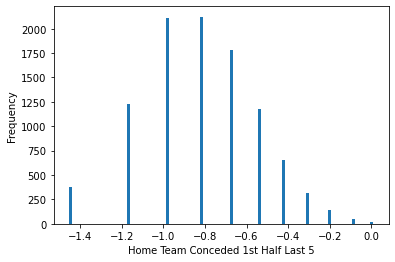

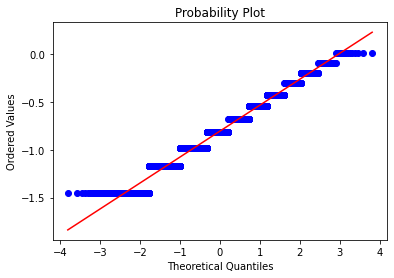

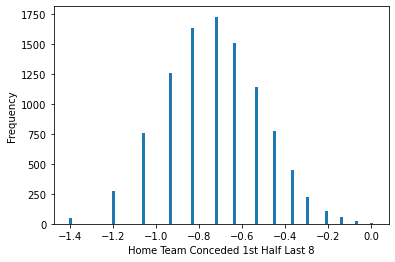

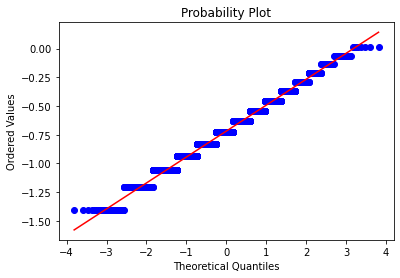

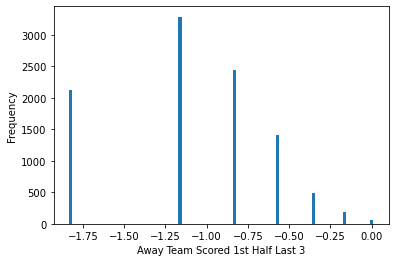

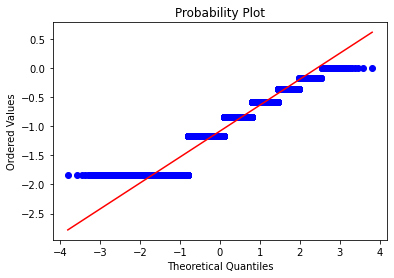

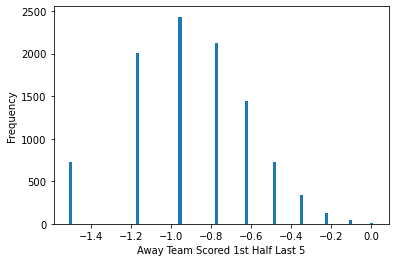

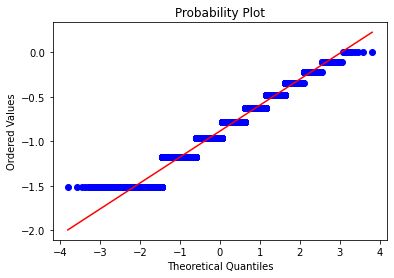

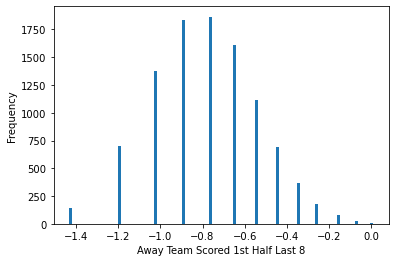

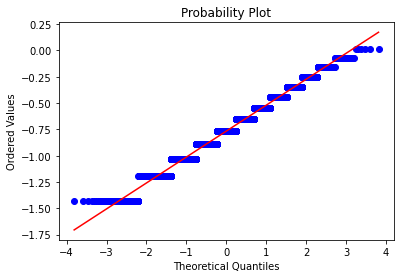

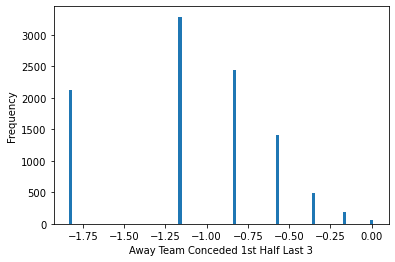

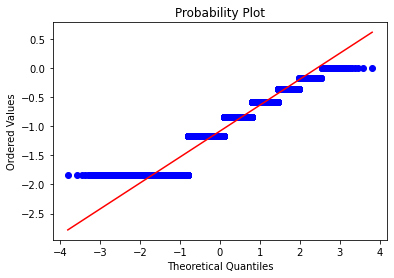

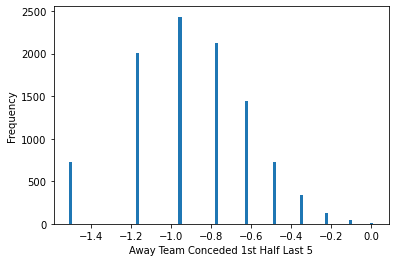

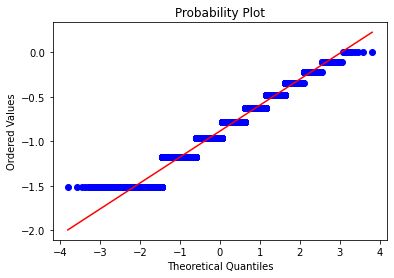

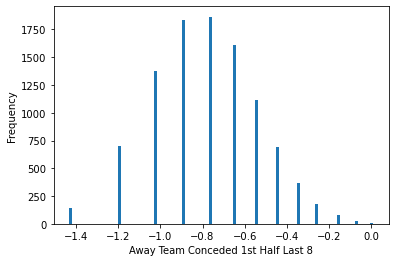

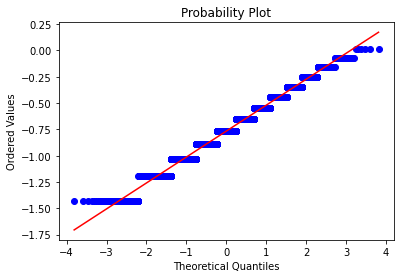

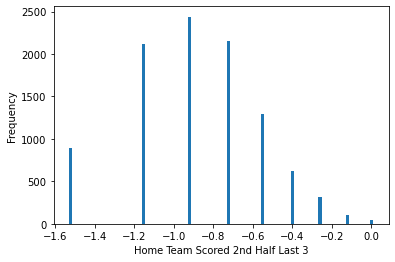

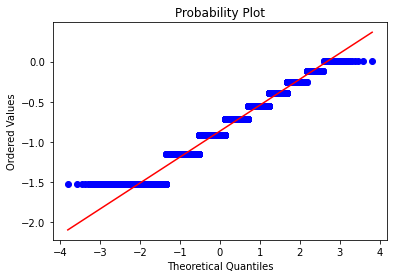

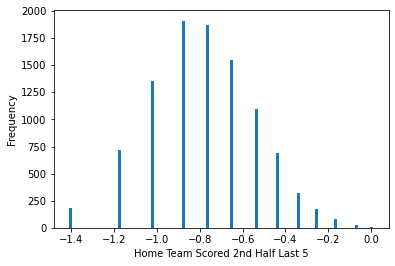

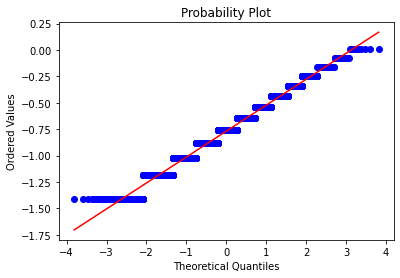

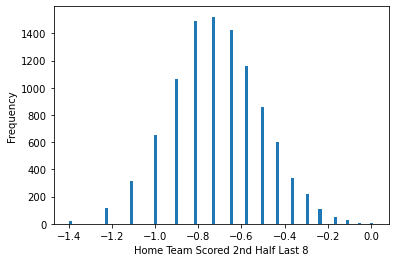

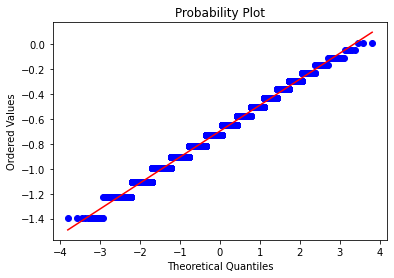

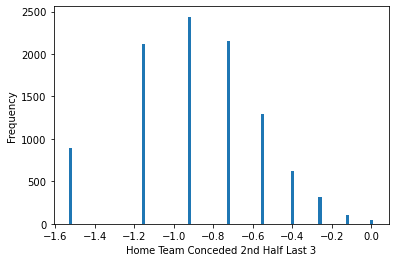

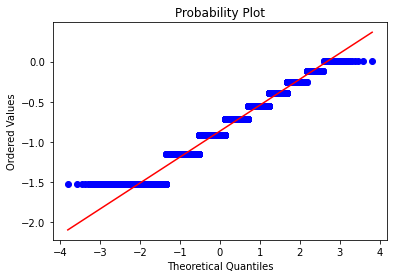

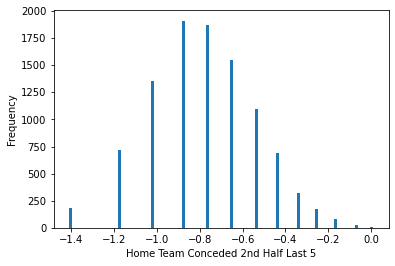

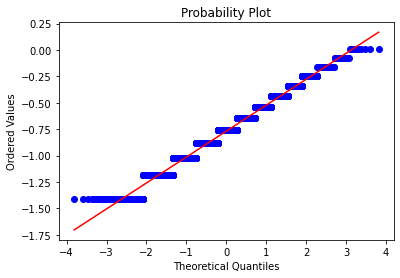

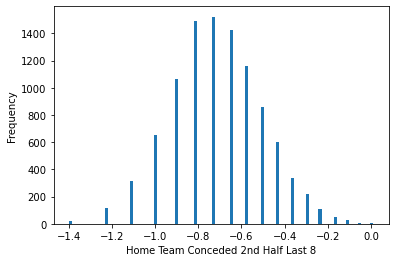

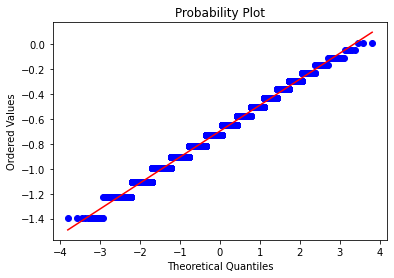

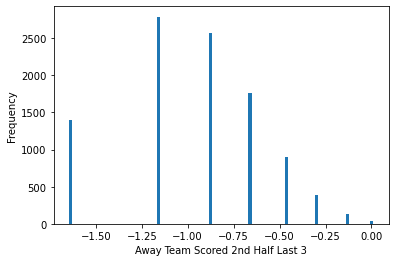

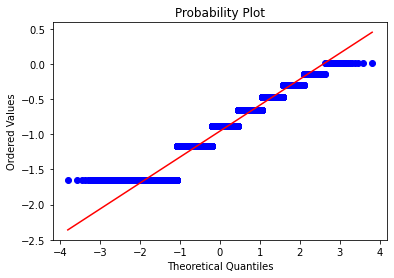

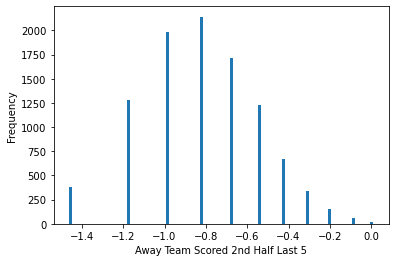

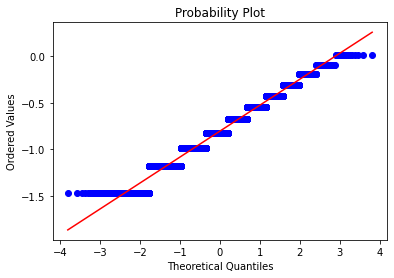

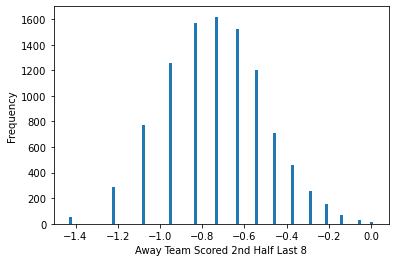

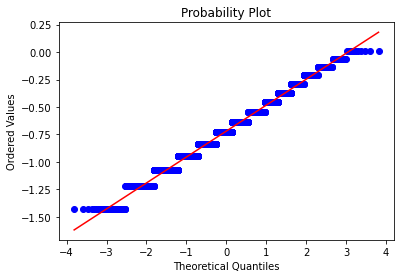

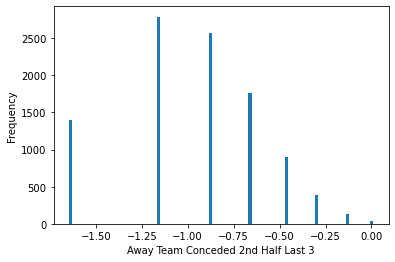

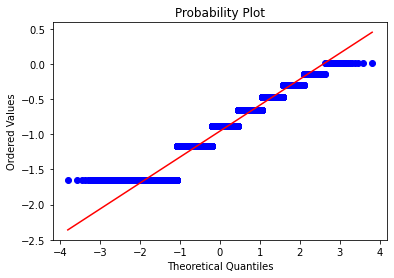

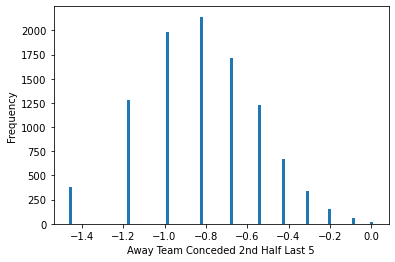

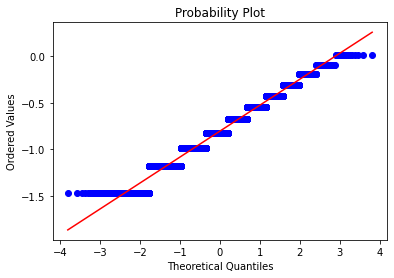

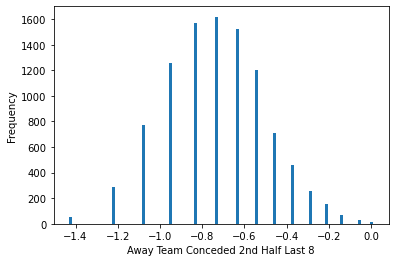

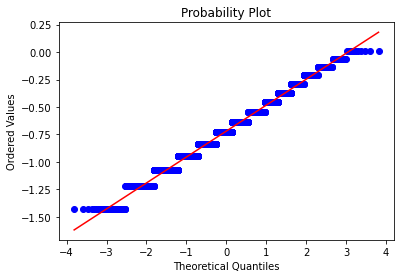

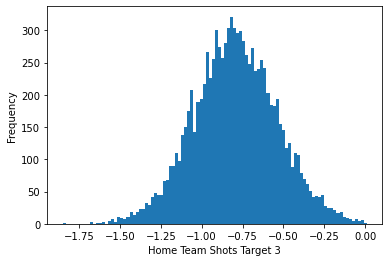

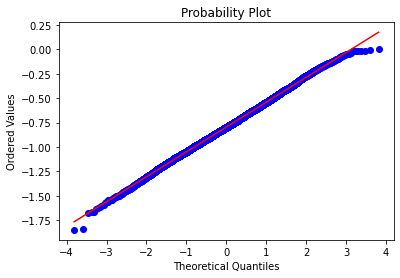

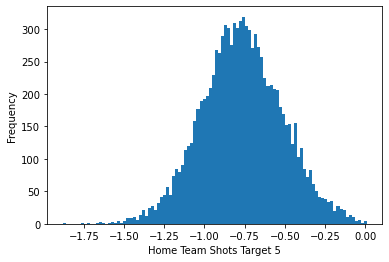

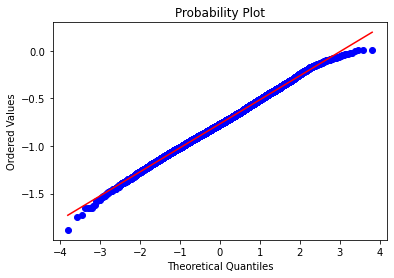

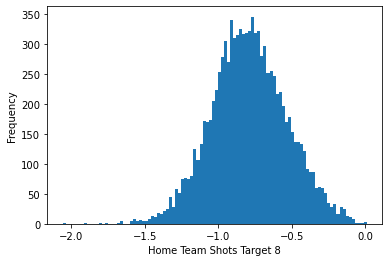

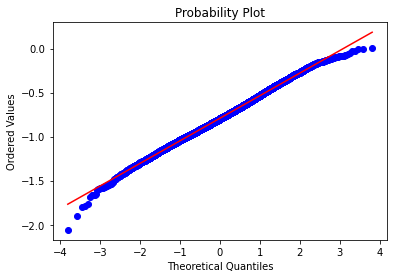

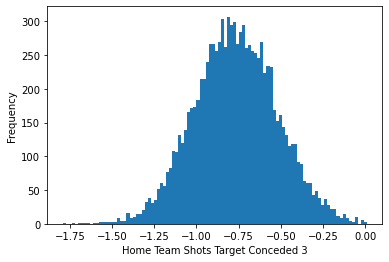

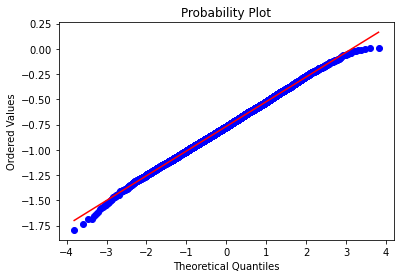

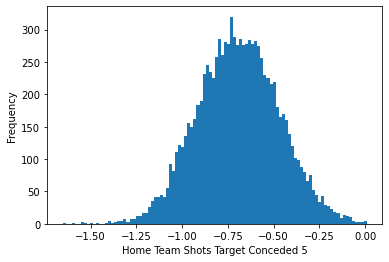

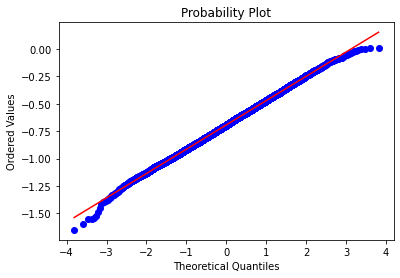

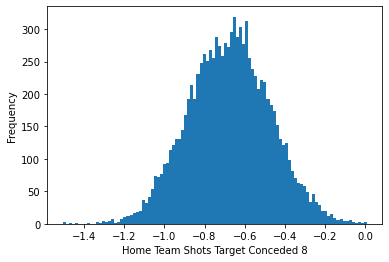

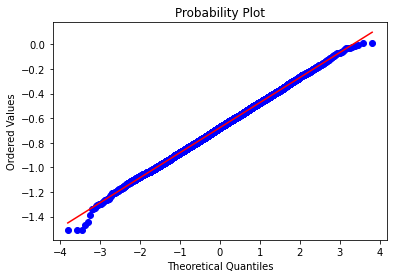

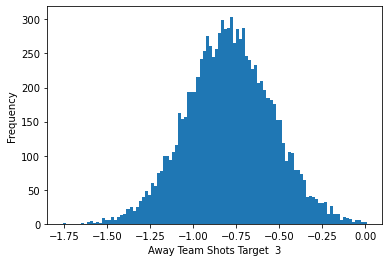

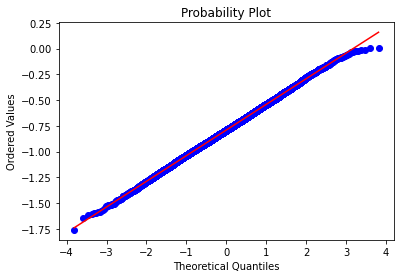

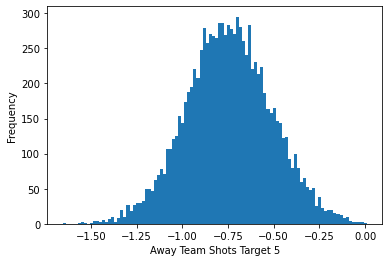

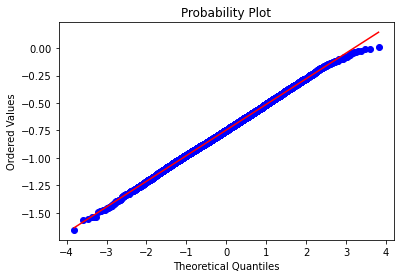

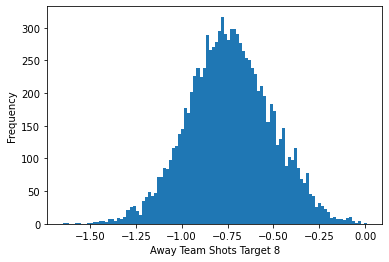

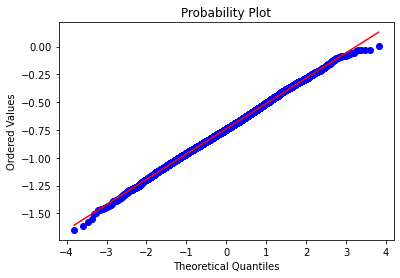

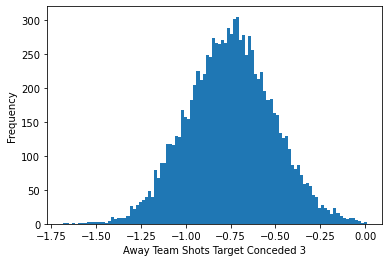

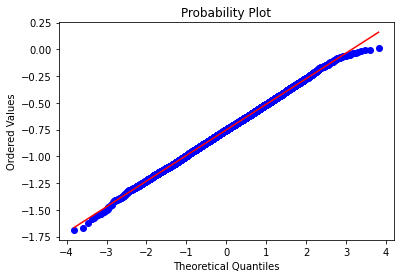

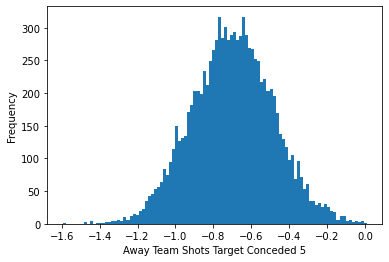

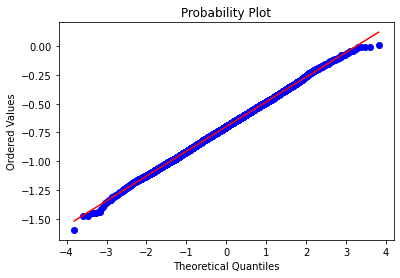

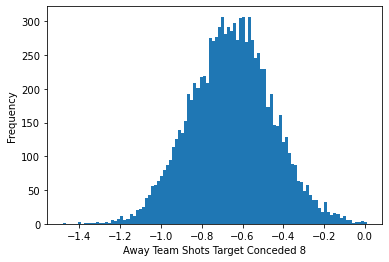

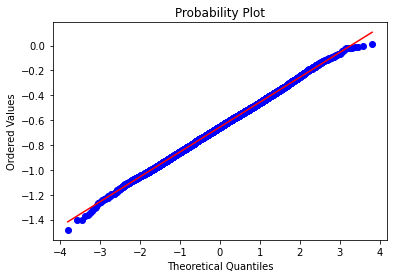

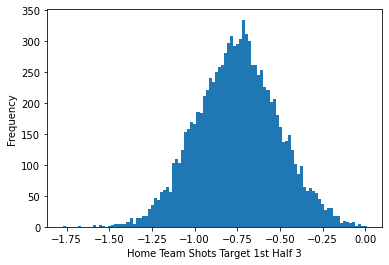

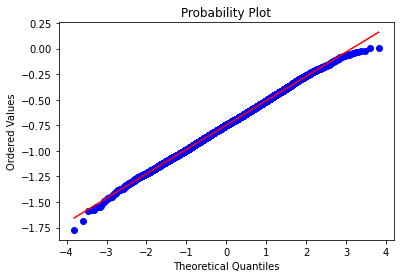

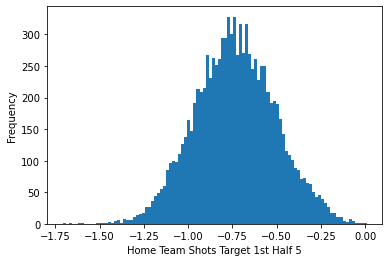

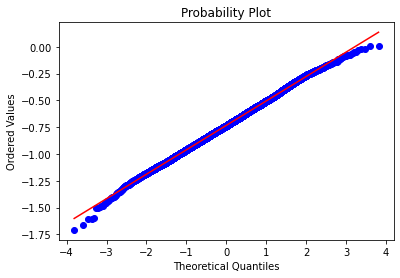

In [17]:
for col in df_normalised.columns[0:50]:
    
    x = df_normalised[col]
    # Create a histogram of the predictor variable
    plt.hist(x, bins=100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Create a Q-Q plot of the predictor variable
    stats.probplot(x, dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

We have scaled and normalised our predictor variables. Given that our data have several moving average columns calculated over periods of 3, 5, and 8 windows, it is highly likely that we have multicollinearity. This can hinder any models ability to uncover relationships in our data. Highly correlated variables increase nose but do not add significant information. As a result our final model's accuracy may be short of what it could be. If we do see significant multicollinearity, we can remove variables. We can also choose a model that is equipped to deal with multicollinearity such as ridge regression, lasso regression, or a tree-based algorithm.

In [18]:
corr_matrix = df.corr()
corr_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
corr_pairs = corr_pairs[corr_pairs != 1.0] 
print(corr_pairs[:50])

home_win_prob                                Home Team Full Time Odds                       0.999882
away_win_prob                                Away Team Full Time Odds                       0.999856
o25_prob                                     Over 2.5 Full Time Odds                        0.999460
BTS Yes Full Time Odds                       bts_prob                                       0.998751
Draw Full Time Odds                          draw_prob                                      0.998515
Away Team Possession For 1st Half 8          Away Team Possession For 1st Half 5            0.985139
Away Team Possession For 8                   Away Team Possession For 5                     0.985080
Home Team Possession For 8                   Home Team Possession For 5                     0.984017
Home Team Possession For 1st Half 5          Home Team Possession For 1st Half 8            0.983994
Away Team Possession For 2nd Half 5          Away Team Possession For 2nd Half 8           

In [19]:
target_var = 'home_win'

targets = ['draw', 'away_win', 'fhg', 'home_goal', 'away_goal', "Total Goals", "Over 2.5",
           "away_win_prob",'home_win_prob', "Home Score", "Away Score", "Draw",
           "fhg", "First Half Home Goals", "First Half Away Goals", "Bucket"]

df1 = df.drop(targets, axis = 1)

corr_matrix = df1.corr()[[target_var]]
corr_matrix_sorted = corr_matrix.iloc[:-1].abs().sort_values(target_var, ascending=False)
corr_pairs = corr_matrix_sorted[corr_matrix_sorted.index.map(lambda x: x[0]!=x[1])]
corr_pairs = corr_pairs[corr_pairs != 1.0] 

print("Highest absolute correlations with Home Win: \n \n ",corr_pairs[1:20])


Highest absolute correlations with Home Win: 
 
                                       home_win
Home Team Full Time Odds             0.374077
Away Team Full Time Odds             0.357659
Home Team Possession For 8           0.180848
draw_prob                            0.180755
Draw Full Time Odds                  0.179828
Home Team Possession For 1st Half 8  0.179363
Home Team Shots Target 8             0.175262
Home Team Possession For 5           0.169134
Home Team Possession For 1st Half 5  0.168314
Home Team Shots 8                    0.164911
Home Team Possession For 2nd Half 8  0.164791
Home Team Conceded Last 8            0.163576
Home Team Scored Last 8              0.163576
Home Team Shots Target 5             0.160622
Home Team Possession For 1st Half 3  0.152322
Home Team Possession For 3           0.151711
Home Team Shots 5                    0.151097
Away Team Possession For 1st Half 8  0.150711
Away Team Shots 8                    0.150042


We have a high degree of multicollinearity. Before removing the highly correlated variables, we will train an xgboost classifier. This is a gradient boosted tree based algorithm, and it is typically robust to multicollinearity.

To analyse the performance of the model, we use the AUC metric. We also construct some functions below to test the efficacy of betting strategy using the model. The first is a simple strategy where we bet on any home win where the prediction meets a given threshold. The second look for disparity between our models predictions and the bookies odds, and backs or lays accordingly. The results given by the laying strategy will be somewhat inaccurate as we are using (1 - odds) instead of using the true price, but it should give a slightly exagerrated estimate of what the true returns would be.

We remove the any target/unnecessary variables and ensure even sampling between target classes with the resample method from sklearn.utils.

In [20]:
def get_profits(odds, preds, threshold, validation_set):

    profit = 0
    bets = 0
    odds = odds.reset_index(drop = True)

    for i in range(len(odds)):

        if preds[i] > threshold:
            bets += 1
            p = odds[i]
            o = 1/(p)
            bet = 1 * o 
            if validation_set[i] == 1:
                profit += (bet - 1)
            else:
                profit += -1
    return profit, bets, profit/bets*100

def get_value_strat1(odds, preds, threshold, validation_set):
    
    c1 = 0
    c2 = 0
    p1 = 0
    odds = odds.reset_index(drop = True)
    
    for i in range(len(preds)):
        if preds[i] > odds[i]:
            if abs(preds[i] - odds[i]) > threshold:
                if validation_set[i] == 1:
                    p = odds[i]
                    o = 1/(p)
                    p1 += (1 * o) - 1
                    c1 += 1
                else:
                    c2 += 1
                    p1 += -1
                    
    return p1, c1, c2, (p1/(c1+c2))*100

def get_value_strat2(odds, preds, threshold, validation_set):
    
    c1 = 0
    c2 = 0
    p1 = 0
    odds = odds.reset_index(drop = True)
    
    for i in range(len(preds)):
        if preds[i] < odds[i]:
            if abs(preds[i] - odds[i]) > threshold:
                if validation_set[i] == 0:
                    p = 1 - odds[i]
                    o = 1/(p)
                    p1 += (1 * o) - 1
                    c1 += 1
                else:
                    c2 += 1
                    p1 += -1
                    
    return p1, c1, c2, (p1/(c1+c2))*100

In [21]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.utils import resample

targets = ['home_win', 'draw', 'away_win', 'fhg', 'home_goal', 'away_goal', 
           "Home Score", "Away Score", 'Over 2.5','Over 1.5','BTS','Draw', 
           "fhg", "First Half Home Goals", "First Half Away Goals", "Bucket", 
           'Total Goals', "Home Team Full Time Odds", "Draw Full Time Odds", "Away Team Full Time Odds"]

cols = df_normalised.columns
df[cols] = df_normalised[cols]

y = df['home_win']
X = df.drop(targets, axis=1)

# Upsample minority class
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0]
y_majority = y[y == 0]
X_upsampled, y_upsampled = resample(X_minority, y_minority, replace=True, n_samples=X_majority.shape[0], random_state=42)

# Combine majority class with upsampled minority class
X_resampled = pd.concat([X_majority, X_upsampled])
y_resampled = pd.concat([y_majority, y_upsampled])

X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
list(X.columns)

['Over 2.5 Full Time Odds',
 'Under 2.5 Full Time Odds',
 'BTS Yes Full Time Odds',
 'BTS No Full Time Odds',
 'Last Home Game Win',
 '2nd Last Home Game Win',
 '3rd Last Home Game Win',
 '4th Last Home Game Win',
 '5th Last Home Game Win',
 'Last Home Game Loss',
 '2nd Last Home Game Loss',
 '3rd Last Home Game Loss',
 '4th Last Home Game Loss',
 '5th Last Home Game Loss',
 'Last Away Game Win',
 '2nd Last Away Game Win',
 '3rd Last Away Game Win',
 '4th Last Away Game Win',
 '5th Last Away Game Win',
 'Last Away Game Loss',
 '2nd Last Away Game Loss',
 '3rd Last Away Game Loss',
 '4th Last Away Game Loss',
 '5th Last Away Game Loss',
 'Last Home Game Score 0',
 '2nd Last Home Game Score 0',
 '3rd Last Home Game Score 0',
 '4th Last Home Game Score 0',
 '5th Last Home Game Score 0',
 'Last Home Game Score 1',
 '2nd Last Home Game Score 1',
 '3rd Last Home Game Score 1',
 '4th Last Home Game Score 1',
 '5th Last Home Game Score 1',
 'Last Home Game Score 2',
 '2nd Last Home Game Score 

In [23]:
odds = X_valid['home_win_prob']

In [24]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.05,
                                      max_depth=1,
                                      n_estimators=1000,
                                      reg_lambda= 0, 
                                      subsample=0.8,
                                      colsample_bytree=0.8,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=1000,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.65162
[1]	validation_0-auc:0.67058
[2]	validation_0-auc:0.67818
[3]	validation_0-auc:0.67773
[4]	validation_0-auc:0.68149
[5]	validation_0-auc:0.68144
[6]	validation_0-auc:0.68145
[7]	validation_0-auc:0.68169
[8]	validation_0-auc:0.69182
[9]	validation_0-auc:0.69195
[10]	validation_0-auc:0.69756
[11]	validation_0-auc:0.69800
[12]	validation_0-auc:0.70160
[13]	validation_0-auc:0.70152
[14]	validation_0-auc:0.70152


C:\Users\kiera\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.70154
[16]	validation_0-auc:0.70154
[17]	validation_0-auc:0.70406
[18]	validation_0-auc:0.70545
[19]	validation_0-auc:0.70545
[20]	validation_0-auc:0.70555
[21]	validation_0-auc:0.70554
[22]	validation_0-auc:0.70570
[23]	validation_0-auc:0.70661
[24]	validation_0-auc:0.70661
[25]	validation_0-auc:0.70634
[26]	validation_0-auc:0.70634
[27]	validation_0-auc:0.70615
[28]	validation_0-auc:0.70634
[29]	validation_0-auc:0.70635
[30]	validation_0-auc:0.70635
[31]	validation_0-auc:0.70711
[32]	validation_0-auc:0.70705
[33]	validation_0-auc:0.70695
[34]	validation_0-auc:0.70691
[35]	validation_0-auc:0.70718
[36]	validation_0-auc:0.70829
[37]	validation_0-auc:0.70830
[38]	validation_0-auc:0.70836
[39]	validation_0-auc:0.70837
[40]	validation_0-auc:0.70837
[41]	validation_0-auc:0.70837
[42]	validation_0-auc:0.70841
[43]	validation_0-auc:0.70841
[44]	validation_0-auc:0.70846
[45]	validation_0-auc:0.70846
[46]	validation_0-auc:0.70846
[47]	validation_0-auc:0.70846
[48]	valid

[283]	validation_0-auc:0.71818
[284]	validation_0-auc:0.71820
[285]	validation_0-auc:0.71811
[286]	validation_0-auc:0.71825
[287]	validation_0-auc:0.71842
[288]	validation_0-auc:0.71840
[289]	validation_0-auc:0.71835
[290]	validation_0-auc:0.71824
[291]	validation_0-auc:0.71815
[292]	validation_0-auc:0.71824
[293]	validation_0-auc:0.71825
[294]	validation_0-auc:0.71825
[295]	validation_0-auc:0.71819
[296]	validation_0-auc:0.71822
[297]	validation_0-auc:0.71843
[298]	validation_0-auc:0.71848
[299]	validation_0-auc:0.71849
[300]	validation_0-auc:0.71849
[301]	validation_0-auc:0.71846
[302]	validation_0-auc:0.71842
[303]	validation_0-auc:0.71849
[304]	validation_0-auc:0.71855
[305]	validation_0-auc:0.71849
[306]	validation_0-auc:0.71862
[307]	validation_0-auc:0.71866
[308]	validation_0-auc:0.71855
[309]	validation_0-auc:0.71873
[310]	validation_0-auc:0.71871
[311]	validation_0-auc:0.71882
[312]	validation_0-auc:0.71904
[313]	validation_0-auc:0.71896
[314]	validation_0-auc:0.71906
[315]	va

[548]	validation_0-auc:0.72404
[549]	validation_0-auc:0.72400
[550]	validation_0-auc:0.72404
[551]	validation_0-auc:0.72401
[552]	validation_0-auc:0.72402
[553]	validation_0-auc:0.72394
[554]	validation_0-auc:0.72390
[555]	validation_0-auc:0.72388
[556]	validation_0-auc:0.72394
[557]	validation_0-auc:0.72397
[558]	validation_0-auc:0.72396
[559]	validation_0-auc:0.72407
[560]	validation_0-auc:0.72407
[561]	validation_0-auc:0.72406
[562]	validation_0-auc:0.72400
[563]	validation_0-auc:0.72409
[564]	validation_0-auc:0.72401
[565]	validation_0-auc:0.72400
[566]	validation_0-auc:0.72392
[567]	validation_0-auc:0.72401
[568]	validation_0-auc:0.72407
[569]	validation_0-auc:0.72386
[570]	validation_0-auc:0.72376
[571]	validation_0-auc:0.72380
[572]	validation_0-auc:0.72377
[573]	validation_0-auc:0.72372
[574]	validation_0-auc:0.72370
[575]	validation_0-auc:0.72373
[576]	validation_0-auc:0.72369
[577]	validation_0-auc:0.72380
[578]	validation_0-auc:0.72374
[579]	validation_0-auc:0.72370
[580]	va

[813]	validation_0-auc:0.72537
[814]	validation_0-auc:0.72540
[815]	validation_0-auc:0.72536
[816]	validation_0-auc:0.72549
[817]	validation_0-auc:0.72548
[818]	validation_0-auc:0.72551
[819]	validation_0-auc:0.72555
[820]	validation_0-auc:0.72560
[821]	validation_0-auc:0.72554
[822]	validation_0-auc:0.72551
[823]	validation_0-auc:0.72543
[824]	validation_0-auc:0.72540
[825]	validation_0-auc:0.72549
[826]	validation_0-auc:0.72547
[827]	validation_0-auc:0.72548
[828]	validation_0-auc:0.72549
[829]	validation_0-auc:0.72553
[830]	validation_0-auc:0.72555
[831]	validation_0-auc:0.72555
[832]	validation_0-auc:0.72558
[833]	validation_0-auc:0.72549
[834]	validation_0-auc:0.72560
[835]	validation_0-auc:0.72559
[836]	validation_0-auc:0.72556
[837]	validation_0-auc:0.72561
[838]	validation_0-auc:0.72562
[839]	validation_0-auc:0.72554
[840]	validation_0-auc:0.72563
[841]	validation_0-auc:0.72577
[842]	validation_0-auc:0.72574
[843]	validation_0-auc:0.72577
[844]	validation_0-auc:0.72588
[845]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [25]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
preds = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, preds)))

validation_set=y_valid.reset_index(drop = True)

AUC Train: 0.7834
AUC Valid: 0.7273


In [26]:
thresholds = [0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.60, 0.65, .70, .75, 0.8, 0.85, 0.9]

for t in thresholds:
    preds1 = []
    for i in range(len(preds)):
        if preds[i] >= t:
            preds1.append(1.)
        else:
            preds1.append(0.)
    print(confusion_matrix(validation_set, preds1))
    no = (confusion_matrix(validation_set, preds1)[0][1]+confusion_matrix(validation_set, preds1)[1][1])
    pa = (confusion_matrix(validation_set, preds1)[1][1]/(confusion_matrix(validation_set, preds1)[0][1]+confusion_matrix(validation_set, preds1)[1][1]))
    print(f"If threshold is {t}, accuracy on positive predictions is {round(pa, 2)*100}%, with {no} samples")   

[[ 183  933]
 [  33 1064]]
If threshold is 0.25, accuracy on positive predictions is 53.0%, with 1997 samples
[[ 287  829]
 [  60 1037]]
If threshold is 0.3, accuracy on positive predictions is 56.00000000000001%, with 1866 samples
[[417 699]
 [125 972]]
If threshold is 0.35, accuracy on positive predictions is 57.99999999999999%, with 1671 samples
[[526 590]
 [198 899]]
If threshold is 0.4, accuracy on positive predictions is 60.0%, with 1489 samples
[[654 462]
 [289 808]]
If threshold is 0.45, accuracy on positive predictions is 64.0%, with 1270 samples
[[752 364]
 [399 698]]
If threshold is 0.5, accuracy on positive predictions is 66.0%, with 1062 samples
[[853 263]
 [494 603]]
If threshold is 0.55, accuracy on positive predictions is 70.0%, with 866 samples
[[937 179]
 [597 500]]
If threshold is 0.6, accuracy on positive predictions is 74.0%, with 679 samples
[[997 119]
 [716 381]]
If threshold is 0.65, accuracy on positive predictions is 76.0%, with 500 samples
[[1045   71]
 [ 802

In [27]:
for t in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]:
    results = get_profits(odds, preds, t, validation_set)
    print(f"At threshold {t} for predictions: \n Profit: {results[0]} \n Number of bets: {results[1]} \n Return %: {results[2]} \n")
print(get_value_strat1(odds, preds, 0.05, validation_set))
print(get_value_strat2(odds, preds, 0.05, validation_set))

At threshold 0.4 for predictions: 
 Profit: 203.98759111540298 
 Number of bets: 1489 
 Return %: 13.69963674381484 

At threshold 0.45 for predictions: 
 Profit: 178.64976339124945 
 Number of bets: 1270 
 Return %: 14.066910503247987 

At threshold 0.5 for predictions: 
 Profit: 113.0006393174201 
 Number of bets: 1062 
 Return %: 10.640361517647843 

At threshold 0.55 for predictions: 
 Profit: 103.78186730093607 
 Number of bets: 866 
 Return %: 11.984049341909477 

At threshold 0.6 for predictions: 
 Profit: 83.14642234530963 
 Number of bets: 679 
 Return %: 12.245423025818797 

At threshold 0.65 for predictions: 
 Profit: 44.443178864231875 
 Number of bets: 500 
 Return %: 8.888635772846374 

At threshold 0.7 for predictions: 
 Profit: 34.84520568748495 
 Number of bets: 366 
 Return %: 9.520548002045068 

At threshold 0.75 for predictions: 
 Profit: 21.40171984118441 
 Number of bets: 262 
 Return %: 8.16859535923069 

(348.2817906928579, 520, 428, 36.73858551612425)
(15.72311

In [28]:
print("AUC BOOKIES: {:.4f}\nAUC Validation: {:.4f}".format(roc_auc_score(y_valid, odds),
                                                    roc_auc_score(y_valid, preds)))

AUC BOOKIES: 0.7085
AUC Validation: 0.7273


Using moving averages, poisson values, and ratios and the bookmakers implied probability, we are able to outperform the Bookies AUC score on the test set. This is before feature selection, model optimisation, and further feature engineering. It is a good start in what is a very efficient market. 

We may be able to improve on this score with further feature selection and model optimisation. We will remove highly correlated features. Tree-based models are generally robust to multicollinearity but we have an overabundance of correlated predictor variables. 

First we will conduct a sensitivity analysis to identify how strongly the model's output depends on the probability variables taken from the bookmakers odds. High correlation between our predictions and the bookmaker odds is not necessarily a bad thing, as the bookies tend to get it right. But overreliance on these variables may lead to poor performance when it comes to implementing a betting strategy. 

Feature ranking:
home_win_prob: 0.04785437509417534
away_win_prob: 0.03757619112730026
Home Team Possession For 8: 0.018491603434085846
Away Team Possession For 2nd Half 8: 0.015346348285675049
Home Team Poisson 1 Against 5: 0.008962214924395084
Home Team Possession For 1st Half 3: 0.007987351156771183
Home First Goal Scored 8: 0.007801193278282881
Home Team Shot Accuracy Goals Against 2nd half 5: 0.007273574359714985
Away Team Corner Average Against 2nd Half 5: 0.007272421848028898
Home First Goal Scored 5: 0.007125033065676689
Away Team Poisson 1 Against 2nd 8: 0.006355488672852516
Away Team Corner Average For 1st Half 8: 0.00634571211412549
Home Team Shots Target 8: 0.006256680004298687
Away Concede Ratio 2nd 8: 0.0061490219086408615
Home Team Shot Accuracy Goals For 1st half 3: 0.00602468429133296
Home Team Shots Target 3: 0.005901418160647154
Home Team Shot Accuracy Goals Against 2nd half 3: 0.005863877013325691
Away Team Poisson 1 For 2nd 3: 0.0058568320237100124
Away Team Shot A

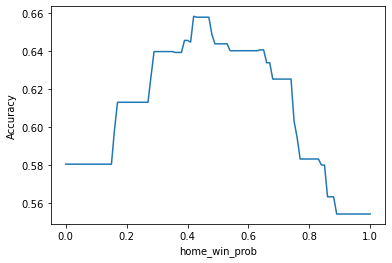

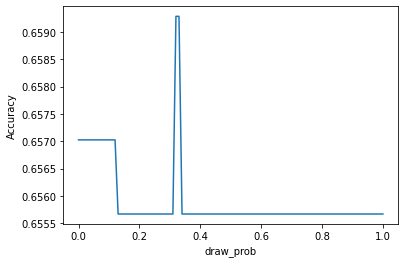

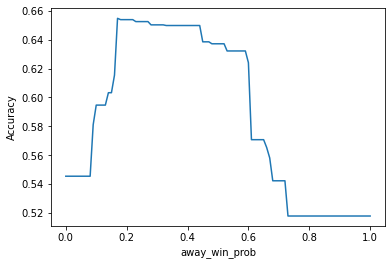

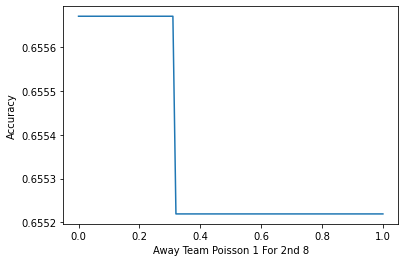

In [29]:
# sensitivity analysis

importances = model_xgboost.feature_importances_

sorted_idx = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {importances[i]}")

feature_names = ['home_win_prob', 'draw_prob', 'away_win_prob', 'Away Team Poisson 1 For 2nd 8']

for feature in feature_names:
    feature_range = np.arange(0, 1.01, 0.01)
    accuracy_scores = []
    for feature_value in feature_range:
        X_valid_temp = X_valid.copy()
        X_valid_temp[feature] = feature_value
        y_pred = model_xgboost.predict(X_valid_temp)
        accuracy = np.mean(y_valid == y_pred)
        accuracy_scores.append(accuracy)
    # plot the results of the sensitivity analysis
    plt.plot(feature_range, accuracy_scores)
    plt.xlabel(feature)
    plt.ylabel('Accuracy')
    plt.show()

In [30]:
print("Corr. between our preds and Bookies: {:.4f}".format(pd.Series(preds).corr(odds.reset_index(drop=True))))

Corr. between our preds and Bookies: 0.9156


This confirms what we suspected. We will remove the highly correlated variables and conduct some further analysis.

In [31]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

target = 'home_win'
correlated_features = set()
corr_matrix = df.corr().abs()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            
            if col1 == target or col2 == target or col1 == 'home_win_prob' or col2 == 'home_win_prob':
                continue
            
            if corr_matrix[col1][target] > corr_matrix[col2][target]:
                
                correlated_features.add(col1)
                
            else:
                
                correlated_features.add(col2)
                
correlated_features
df1 = df_original.drop(list(correlated_features), axis = 1)

In [32]:
targets = ['home_win', 'draw', 'away_win', 'fhg', 'home_goal', 'away_goal',
          "Home Score", "Away Score", 'Total Goals', 'Over 1.5', 'BTS', "Bucket",
           "fhg", "First Half Home Goals", "First Half Away Goals"]

cols = df_normalised.columns
df1[cols] = df_normalised[cols]

y = df1['home_win']
X = df1.drop(targets, axis = 1)

# Upsample minority class
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0]
y_majority = y[y == 0]
X_upsampled, y_upsampled = resample(X_minority, y_minority, replace=True, n_samples=X_majority.shape[0], random_state=42)

# Combine majority class with upsampled minority class
X_resampled = pd.concat([X_majority, X_upsampled])
y_resampled = pd.concat([y_majority, y_upsampled])

X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:
list(X.columns)

['Draw Full Time Odds',
 'Away Team Full Time Odds',
 'BTS No Full Time Odds',
 'Last Home Game Win',
 '2nd Last Home Game Win',
 '3rd Last Home Game Win',
 '4th Last Home Game Win',
 '5th Last Home Game Win',
 'Last Home Game Loss',
 '2nd Last Home Game Loss',
 '3rd Last Home Game Loss',
 '4th Last Home Game Loss',
 '5th Last Home Game Loss',
 'Last Away Game Win',
 '2nd Last Away Game Win',
 '3rd Last Away Game Win',
 '4th Last Away Game Win',
 '5th Last Away Game Win',
 'Last Away Game Loss',
 '2nd Last Away Game Loss',
 '3rd Last Away Game Loss',
 '4th Last Away Game Loss',
 '5th Last Away Game Loss',
 'Last Home Game Score 0',
 '2nd Last Home Game Score 0',
 '3rd Last Home Game Score 0',
 '4th Last Home Game Score 0',
 '5th Last Home Game Score 0',
 'Last Home Game Score 1',
 '2nd Last Home Game Score 1',
 '3rd Last Home Game Score 1',
 '4th Last Home Game Score 1',
 '5th Last Home Game Score 1',
 '2nd Last Home Game Score 2',
 '3rd Last Home Game Score 2',
 '4th Last Home Game Sc

In [36]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.05,
                                      max_depth=1,
                                      n_estimators=1000,
                                      reg_lambda= 0, 
                                      subsample=0.8,
                                      colsample_bytree=0.8,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=1000,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.65457
[1]	validation_0-auc:0.66860
[2]	validation_0-auc:0.66935
[3]	validation_0-auc:0.67030
[4]	validation_0-auc:0.67636
[5]	validation_0-auc:0.67639
[6]	validation_0-auc:0.68449
[7]	validation_0-auc:0.69114
[8]	validation_0-auc:0.69114
[9]	validation_0-auc:0.69135
[10]	validation_0-auc:0.69462
[11]	validation_0-auc:0.69455
[12]	validation_0-auc:0.69601
[13]	validation_0-auc:0.69597
[14]	validation_0-auc:0.69608
[15]	validation_0-auc:0.69608
[16]	validation_0-auc:0.69684
[17]	validation_0-auc:0.70479
[18]	validation_0-auc:0.70512
[19]	validation_0-auc:0.70509
[20]	validation_0-auc:0.70476
[21]	validation_0-auc:0.70478
[22]	validation_0-auc:0.70475
[23]	validation_0-auc:0.70475
[24]	validation_0-auc:0.70478
[25]	validation_0-auc:0.70477


C:\Users\kiera\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.70477
[27]	validation_0-auc:0.70518
[28]	validation_0-auc:0.70529
[29]	validation_0-auc:0.70527
[30]	validation_0-auc:0.70645
[31]	validation_0-auc:0.70759
[32]	validation_0-auc:0.70755
[33]	validation_0-auc:0.70772
[34]	validation_0-auc:0.70772
[35]	validation_0-auc:0.70795
[36]	validation_0-auc:0.70798
[37]	validation_0-auc:0.70787
[38]	validation_0-auc:0.70795
[39]	validation_0-auc:0.70794
[40]	validation_0-auc:0.70794
[41]	validation_0-auc:0.70794
[42]	validation_0-auc:0.70796
[43]	validation_0-auc:0.70798
[44]	validation_0-auc:0.70824
[45]	validation_0-auc:0.70824
[46]	validation_0-auc:0.70824
[47]	validation_0-auc:0.70824
[48]	validation_0-auc:0.70823
[49]	validation_0-auc:0.70821
[50]	validation_0-auc:0.70821
[51]	validation_0-auc:0.70821
[52]	validation_0-auc:0.70821
[53]	validation_0-auc:0.70875
[54]	validation_0-auc:0.70874
[55]	validation_0-auc:0.70874
[56]	validation_0-auc:0.70875
[57]	validation_0-auc:0.70870
[58]	validation_0-auc:0.70870
[59]	valid

[293]	validation_0-auc:0.71561
[294]	validation_0-auc:0.71561
[295]	validation_0-auc:0.71558
[296]	validation_0-auc:0.71558
[297]	validation_0-auc:0.71547
[298]	validation_0-auc:0.71557
[299]	validation_0-auc:0.71562
[300]	validation_0-auc:0.71561
[301]	validation_0-auc:0.71559
[302]	validation_0-auc:0.71578
[303]	validation_0-auc:0.71578
[304]	validation_0-auc:0.71584
[305]	validation_0-auc:0.71575
[306]	validation_0-auc:0.71579
[307]	validation_0-auc:0.71580
[308]	validation_0-auc:0.71570
[309]	validation_0-auc:0.71569
[310]	validation_0-auc:0.71577
[311]	validation_0-auc:0.71586
[312]	validation_0-auc:0.71594
[313]	validation_0-auc:0.71588
[314]	validation_0-auc:0.71585
[315]	validation_0-auc:0.71594
[316]	validation_0-auc:0.71606
[317]	validation_0-auc:0.71610
[318]	validation_0-auc:0.71609
[319]	validation_0-auc:0.71621
[320]	validation_0-auc:0.71616
[321]	validation_0-auc:0.71615
[322]	validation_0-auc:0.71616
[323]	validation_0-auc:0.71629
[324]	validation_0-auc:0.71618
[325]	va

[558]	validation_0-auc:0.71984
[559]	validation_0-auc:0.71993
[560]	validation_0-auc:0.71991
[561]	validation_0-auc:0.71994
[562]	validation_0-auc:0.71990
[563]	validation_0-auc:0.71978
[564]	validation_0-auc:0.71975
[565]	validation_0-auc:0.71976
[566]	validation_0-auc:0.71977
[567]	validation_0-auc:0.71970
[568]	validation_0-auc:0.71979
[569]	validation_0-auc:0.71976
[570]	validation_0-auc:0.71966
[571]	validation_0-auc:0.71972
[572]	validation_0-auc:0.71965
[573]	validation_0-auc:0.71971
[574]	validation_0-auc:0.71972
[575]	validation_0-auc:0.71965
[576]	validation_0-auc:0.71973
[577]	validation_0-auc:0.71979
[578]	validation_0-auc:0.71974
[579]	validation_0-auc:0.71978
[580]	validation_0-auc:0.71976
[581]	validation_0-auc:0.71969
[582]	validation_0-auc:0.71969
[583]	validation_0-auc:0.71967
[584]	validation_0-auc:0.71969
[585]	validation_0-auc:0.71985
[586]	validation_0-auc:0.71987
[587]	validation_0-auc:0.71988
[588]	validation_0-auc:0.71989
[589]	validation_0-auc:0.71988
[590]	va

[823]	validation_0-auc:0.72117
[824]	validation_0-auc:0.72116
[825]	validation_0-auc:0.72119
[826]	validation_0-auc:0.72119
[827]	validation_0-auc:0.72115
[828]	validation_0-auc:0.72113
[829]	validation_0-auc:0.72119
[830]	validation_0-auc:0.72114
[831]	validation_0-auc:0.72121
[832]	validation_0-auc:0.72124
[833]	validation_0-auc:0.72131
[834]	validation_0-auc:0.72132
[835]	validation_0-auc:0.72127
[836]	validation_0-auc:0.72126
[837]	validation_0-auc:0.72133
[838]	validation_0-auc:0.72134
[839]	validation_0-auc:0.72140
[840]	validation_0-auc:0.72149
[841]	validation_0-auc:0.72155
[842]	validation_0-auc:0.72153
[843]	validation_0-auc:0.72152
[844]	validation_0-auc:0.72160
[845]	validation_0-auc:0.72158
[846]	validation_0-auc:0.72158
[847]	validation_0-auc:0.72157
[848]	validation_0-auc:0.72152
[849]	validation_0-auc:0.72147
[850]	validation_0-auc:0.72132
[851]	validation_0-auc:0.72130
[852]	validation_0-auc:0.72128
[853]	validation_0-auc:0.72124
[854]	validation_0-auc:0.72128
[855]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [37]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
preds = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}".format(roc_auc_score(y_valid, preds)))
print("AUC BOOKIES: {:.4f}\nAUC Validation: {:.4f}".format(roc_auc_score(y_valid, odds),
                                                    roc_auc_score(y_valid, preds)))

print("Corr. between our preds and Bookies: {:.4f}".format(pd.Series(preds).corr(odds.reset_index(drop=True))))

validation_set=y_valid.reset_index(drop = True)

thresholds = [0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.60, 0.65, .70, .75, 0.8, 0.85, 0.9]

for t in thresholds:
    preds1 = []
    for i in range(len(preds)):
        if preds[i] >= t:
            preds1.append(1.)
        else:
            preds1.append(0.)
    print(confusion_matrix(validation_set, preds1))
    no = (confusion_matrix(validation_set, preds1)[0][1]+confusion_matrix(validation_set, preds1)[1][1])
    pa = (confusion_matrix(validation_set, preds1)[1][1]/(confusion_matrix(validation_set, preds1)[0][1]+confusion_matrix(validation_set, preds1)[1][1]))
    print(f"If threshold is {t}, accuracy on positive predictions is {round(pa, 2)*100}%, with {no} samples")   

AUC Train: 0.7226
AUC BOOKIES: 0.7085
AUC Validation: 0.7226
Corr. between our preds and Bookies: 0.9313
[[ 162  954]
 [  30 1067]]
If threshold is 0.25, accuracy on positive predictions is 53.0%, with 2021 samples
[[ 265  851]
 [  61 1036]]
If threshold is 0.3, accuracy on positive predictions is 55.00000000000001%, with 1887 samples
[[403 713]
 [131 966]]
If threshold is 0.35, accuracy on positive predictions is 57.99999999999999%, with 1679 samples
[[533 583]
 [199 898]]
If threshold is 0.4, accuracy on positive predictions is 61.0%, with 1481 samples
[[650 466]
 [303 794]]
If threshold is 0.45, accuracy on positive predictions is 63.0%, with 1260 samples
[[754 362]
 [410 687]]
If threshold is 0.5, accuracy on positive predictions is 65.0%, with 1049 samples
[[858 258]
 [510 587]]
If threshold is 0.55, accuracy on positive predictions is 69.0%, with 845 samples
[[942 174]
 [622 475]]
If threshold is 0.6, accuracy on positive predictions is 73.0%, with 649 samples
[[998 118]
 [713 38

In [38]:
for t in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]:
    results = get_profits(odds, preds, t, validation_set)
    print(f"At threshold {t} for predictions: \n Profit: {results[0]} \n Number of bets: {results[1]} \n Return %: {results[2]} \n")
print(get_value_strat1(odds, preds, 0.05, validation_set))
print(get_value_strat2(odds, preds, 0.05, validation_set))

At threshold 0.4 for predictions: 
 Profit: 199.79514710760137 
 Number of bets: 1481 
 Return %: 13.490556860742833 

At threshold 0.45 for predictions: 
 Profit: 142.78739821032218 
 Number of bets: 1260 
 Return %: 11.332333191295412 

At threshold 0.5 for predictions: 
 Profit: 93.58887549329826 
 Number of bets: 1049 
 Return %: 8.921723116615658 

At threshold 0.55 for predictions: 
 Profit: 85.7166226593864 
 Number of bets: 845 
 Return %: 10.143979012945136 

At threshold 0.6 for predictions: 
 Profit: 61.69457550991165 
 Number of bets: 649 
 Return %: 9.506097921403953 

At threshold 0.65 for predictions: 
 Profit: 42.69951683772016 
 Number of bets: 502 
 Return %: 8.505879848151427 

At threshold 0.7 for predictions: 
 Profit: 28.844230231504945 
 Number of bets: 367 
 Return %: 7.859463278339223 

At threshold 0.75 for predictions: 
 Profit: 14.564914763084115 
 Number of bets: 243 
 Return %: 5.99379208357371 

(330.1752162435657, 489, 406, 36.891085613806226)
(15.882186

Removing the correlated variables has led to a slight decrease in our AUC score and our model still outperforms the Bookies. The model is clearly still dependent on the bookmakers odds and more so than with our first model. Before going any further we will skip the box cox transformation and create another model. With gradient boosted tree based algorithms it is not generally necessary to have predictors that are normally distributed. We will use only the scaled variables instead and see if there is any difference.

In [39]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

target = 'home_win'
correlated_features = set()
corr_matrix = df.corr().abs()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            
            if col1 == target or col2 == target or col1 == 'home_win_prob' or col2 == 'home_win_prob':
                continue
            
            if corr_matrix[col1][target] > corr_matrix[col2][target]:
                
                correlated_features.add(col1)
                
            else:
                
                correlated_features.add(col2)

df1 = df_original.drop(list(correlated_features), axis = 1)

In [40]:
targets = ['home_win', 'draw', 'away_win', 'fhg', 'home_goal', 'away_goal',
           "Home Score", "Away Score", "Over 1.5", "BTS",
           "fhg", "First Half Home Goals", "First Half Away Goals",
          'Total Goals','Bucket']

cols = df_scaled.columns

df1[cols] = df_scaled[cols]

y = df1['home_win']
X = df1.drop(targets, axis = 1)

# Upsample minority class
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0]
y_majority = y[y == 0]
X_upsampled, y_upsampled = resample(X_minority, y_minority, replace=True, n_samples=X_majority.shape[0], random_state=42)

# Combine majority class with upsampled minority class
X_resampled = pd.concat([X_majority, X_upsampled])
y_resampled = pd.concat([y_majority, y_upsampled])

X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [41]:
list(X.columns)

['Draw Full Time Odds',
 'Away Team Full Time Odds',
 'BTS No Full Time Odds',
 'Last Home Game Win',
 '2nd Last Home Game Win',
 '3rd Last Home Game Win',
 '4th Last Home Game Win',
 '5th Last Home Game Win',
 'Last Home Game Loss',
 '2nd Last Home Game Loss',
 '3rd Last Home Game Loss',
 '4th Last Home Game Loss',
 '5th Last Home Game Loss',
 'Last Away Game Win',
 '2nd Last Away Game Win',
 '3rd Last Away Game Win',
 '4th Last Away Game Win',
 '5th Last Away Game Win',
 'Last Away Game Loss',
 '2nd Last Away Game Loss',
 '3rd Last Away Game Loss',
 '4th Last Away Game Loss',
 '5th Last Away Game Loss',
 'Last Home Game Score 0',
 '2nd Last Home Game Score 0',
 '3rd Last Home Game Score 0',
 '4th Last Home Game Score 0',
 '5th Last Home Game Score 0',
 'Last Home Game Score 1',
 '2nd Last Home Game Score 1',
 '3rd Last Home Game Score 1',
 '4th Last Home Game Score 1',
 '5th Last Home Game Score 1',
 '2nd Last Home Game Score 2',
 '3rd Last Home Game Score 2',
 '4th Last Home Game Sc

In [42]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.05,
                                      max_depth=1,
                                      n_estimators=1000,
                                      reg_lambda= 0, 
                                      subsample=0.8,
                                      colsample_bytree=0.8,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=1000,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.65457
[1]	validation_0-auc:0.66860
[2]	validation_0-auc:0.66935
[3]	validation_0-auc:0.67030
[4]	validation_0-auc:0.67636
[5]	validation_0-auc:0.67639
[6]	validation_0-auc:0.68449
[7]	validation_0-auc:0.69114
[8]	validation_0-auc:0.69114
[9]	validation_0-auc:0.69135
[10]	validation_0-auc:0.69462
[11]	validation_0-auc:0.69455
[12]	validation_0-auc:0.69601
[13]	validation_0-auc:0.69597
[14]	validation_0-auc:0.69608
[15]	validation_0-auc:0.69608
[16]	validation_0-auc:0.69684
[17]	validation_0-auc:0.70479
[18]	validation_0-auc:0.70512
[19]	validation_0-auc:0.70509
[20]	validation_0-auc:0.70476
[21]	validation_0-auc:0.70478
[22]	validation_0-auc:0.70475
[23]	validation_0-auc:0.70475


C:\Users\kiera\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.70478
[25]	validation_0-auc:0.70477
[26]	validation_0-auc:0.70477
[27]	validation_0-auc:0.70518
[28]	validation_0-auc:0.70529
[29]	validation_0-auc:0.70527
[30]	validation_0-auc:0.70645
[31]	validation_0-auc:0.70759
[32]	validation_0-auc:0.70755
[33]	validation_0-auc:0.70772
[34]	validation_0-auc:0.70772
[35]	validation_0-auc:0.70795
[36]	validation_0-auc:0.70798
[37]	validation_0-auc:0.70787
[38]	validation_0-auc:0.70795
[39]	validation_0-auc:0.70794
[40]	validation_0-auc:0.70794
[41]	validation_0-auc:0.70794
[42]	validation_0-auc:0.70796
[43]	validation_0-auc:0.70798
[44]	validation_0-auc:0.70824
[45]	validation_0-auc:0.70824
[46]	validation_0-auc:0.70824
[47]	validation_0-auc:0.70824
[48]	validation_0-auc:0.70823
[49]	validation_0-auc:0.70821
[50]	validation_0-auc:0.70821
[51]	validation_0-auc:0.70821
[52]	validation_0-auc:0.70821
[53]	validation_0-auc:0.70875
[54]	validation_0-auc:0.70874
[55]	validation_0-auc:0.70874
[56]	validation_0-auc:0.70875
[57]	valid

[291]	validation_0-auc:0.71565
[292]	validation_0-auc:0.71572
[293]	validation_0-auc:0.71561
[294]	validation_0-auc:0.71561
[295]	validation_0-auc:0.71558
[296]	validation_0-auc:0.71558
[297]	validation_0-auc:0.71547
[298]	validation_0-auc:0.71557
[299]	validation_0-auc:0.71562
[300]	validation_0-auc:0.71561
[301]	validation_0-auc:0.71559
[302]	validation_0-auc:0.71578
[303]	validation_0-auc:0.71578
[304]	validation_0-auc:0.71584
[305]	validation_0-auc:0.71575
[306]	validation_0-auc:0.71579
[307]	validation_0-auc:0.71580
[308]	validation_0-auc:0.71570
[309]	validation_0-auc:0.71569
[310]	validation_0-auc:0.71577
[311]	validation_0-auc:0.71586
[312]	validation_0-auc:0.71594
[313]	validation_0-auc:0.71588
[314]	validation_0-auc:0.71585
[315]	validation_0-auc:0.71594
[316]	validation_0-auc:0.71606
[317]	validation_0-auc:0.71610
[318]	validation_0-auc:0.71609
[319]	validation_0-auc:0.71621
[320]	validation_0-auc:0.71616
[321]	validation_0-auc:0.71615
[322]	validation_0-auc:0.71616
[323]	va

[556]	validation_0-auc:0.71984
[557]	validation_0-auc:0.71986
[558]	validation_0-auc:0.71984
[559]	validation_0-auc:0.71993
[560]	validation_0-auc:0.71991
[561]	validation_0-auc:0.71994
[562]	validation_0-auc:0.71990
[563]	validation_0-auc:0.71978
[564]	validation_0-auc:0.71975
[565]	validation_0-auc:0.71976
[566]	validation_0-auc:0.71977
[567]	validation_0-auc:0.71970
[568]	validation_0-auc:0.71979
[569]	validation_0-auc:0.71976
[570]	validation_0-auc:0.71966
[571]	validation_0-auc:0.71972
[572]	validation_0-auc:0.71965
[573]	validation_0-auc:0.71971
[574]	validation_0-auc:0.71972
[575]	validation_0-auc:0.71965
[576]	validation_0-auc:0.71973
[577]	validation_0-auc:0.71979
[578]	validation_0-auc:0.71974
[579]	validation_0-auc:0.71978
[580]	validation_0-auc:0.71976
[581]	validation_0-auc:0.71969
[582]	validation_0-auc:0.71969
[583]	validation_0-auc:0.71967
[584]	validation_0-auc:0.71969
[585]	validation_0-auc:0.71985
[586]	validation_0-auc:0.71987
[587]	validation_0-auc:0.71988
[588]	va

[821]	validation_0-auc:0.72107
[822]	validation_0-auc:0.72116
[823]	validation_0-auc:0.72117
[824]	validation_0-auc:0.72116
[825]	validation_0-auc:0.72119
[826]	validation_0-auc:0.72119
[827]	validation_0-auc:0.72115
[828]	validation_0-auc:0.72113
[829]	validation_0-auc:0.72119
[830]	validation_0-auc:0.72114
[831]	validation_0-auc:0.72121
[832]	validation_0-auc:0.72124
[833]	validation_0-auc:0.72131
[834]	validation_0-auc:0.72132
[835]	validation_0-auc:0.72127
[836]	validation_0-auc:0.72126
[837]	validation_0-auc:0.72133
[838]	validation_0-auc:0.72134
[839]	validation_0-auc:0.72140
[840]	validation_0-auc:0.72149
[841]	validation_0-auc:0.72155
[842]	validation_0-auc:0.72153
[843]	validation_0-auc:0.72152
[844]	validation_0-auc:0.72160
[845]	validation_0-auc:0.72158
[846]	validation_0-auc:0.72158
[847]	validation_0-auc:0.72157
[848]	validation_0-auc:0.72152
[849]	validation_0-auc:0.72147
[850]	validation_0-auc:0.72132
[851]	validation_0-auc:0.72130
[852]	validation_0-auc:0.72128
[853]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [43]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
preds = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}".format(roc_auc_score(y_valid, preds)))
print("AUC BOOKIES: {:.4f}\nAUC Validation: {:.4f}".format(roc_auc_score(y_valid, odds),
                                                    roc_auc_score(y_valid, preds)))

print("Corr. between our preds and Bookies: {:.4f}".format(pd.Series(preds).corr(odds.reset_index(drop=True))))

validation_set=y_valid.reset_index(drop = True)

thresholds = [0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.60, 0.65, .70, .75, 0.8, 0.85, 0.9]

for t in thresholds:
    preds1 = []
    for i in range(len(preds)):
        if preds[i] >= t:
            preds1.append(1.)
        else:
            preds1.append(0.)
    print(confusion_matrix(validation_set, preds1))
    no = (confusion_matrix(validation_set, preds1)[0][1]+confusion_matrix(validation_set, preds1)[1][1])
    pa = (confusion_matrix(validation_set, preds1)[1][1]/(confusion_matrix(validation_set, preds1)[0][1]+confusion_matrix(validation_set, preds1)[1][1]))
    print(f"If threshold is {t}, accuracy on positive predictions is {round(pa, 2)*100}%, with {no} samples")  

AUC Train: 0.7226
AUC BOOKIES: 0.7085
AUC Validation: 0.7226
Corr. between our preds and Bookies: 0.9313
[[ 162  954]
 [  30 1067]]
If threshold is 0.25, accuracy on positive predictions is 53.0%, with 2021 samples
[[ 265  851]
 [  61 1036]]
If threshold is 0.3, accuracy on positive predictions is 55.00000000000001%, with 1887 samples
[[403 713]
 [131 966]]
If threshold is 0.35, accuracy on positive predictions is 57.99999999999999%, with 1679 samples
[[533 583]
 [199 898]]
If threshold is 0.4, accuracy on positive predictions is 61.0%, with 1481 samples
[[650 466]
 [303 794]]
If threshold is 0.45, accuracy on positive predictions is 63.0%, with 1260 samples
[[754 362]
 [410 687]]
If threshold is 0.5, accuracy on positive predictions is 65.0%, with 1049 samples
[[858 258]
 [510 587]]
If threshold is 0.55, accuracy on positive predictions is 69.0%, with 845 samples
[[942 174]
 [622 475]]
If threshold is 0.6, accuracy on positive predictions is 73.0%, with 649 samples
[[998 118]
 [713 38

In [44]:
for t in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]:
    results = get_profits(odds, preds, t, validation_set)
    print(f"At threshold {t} for predictions: \n Profit: {results[0]} \n Number of bets: {results[1]} \n Return %: {results[2]} \n")

print(get_value_strat1(odds, preds, 0.05, validation_set))
print(get_value_strat2(odds, preds, 0.05, validation_set))

At threshold 0.4 for predictions: 
 Profit: 199.79514710760137 
 Number of bets: 1481 
 Return %: 13.490556860742833 

At threshold 0.45 for predictions: 
 Profit: 142.78739821032218 
 Number of bets: 1260 
 Return %: 11.332333191295412 

At threshold 0.5 for predictions: 
 Profit: 93.58887549329826 
 Number of bets: 1049 
 Return %: 8.921723116615658 

At threshold 0.55 for predictions: 
 Profit: 85.7166226593864 
 Number of bets: 845 
 Return %: 10.143979012945136 

At threshold 0.6 for predictions: 
 Profit: 61.69457550991165 
 Number of bets: 649 
 Return %: 9.506097921403953 

At threshold 0.65 for predictions: 
 Profit: 42.69951683772016 
 Number of bets: 502 
 Return %: 8.505879848151427 

At threshold 0.7 for predictions: 
 Profit: 28.844230231504945 
 Number of bets: 367 
 Return %: 7.859463278339223 

At threshold 0.75 for predictions: 
 Profit: 14.564914763084115 
 Number of bets: 243 
 Return %: 5.99379208357371 

(330.1752162435657, 489, 406, 36.891085613806226)
(15.882186

There is no difference between the models when using normalisation or not. We may be able to skip this step for future models and save time and power. Sensitivity analysis showed us that our model was heavily dependent on the bookies odds and also showed us that many variables were insignificant in their predictive power. We may be able to remove these variables in later use. 

The model with the best performance used the full dataset with scaling and normalisation, and shows that there is a path towards using machine learning to generate soccer match predictions that can outperform the bookmakers and generate profitable betting strategies. But this is just the start. Next, we will build lasso, ridge and random forest classifiers for comparison. We will then optimise the best model and introduce k-fold validation to ensure greater robustness of the final model. We will also experiment with feature engineering and other techniques to deal with the imbalance in our target variables. Additionally we can scrape more data from a wider variety of leagues. We can also use more advanced statistics like expected goals for/against as well as player statistics. 